In [74]:
import sys
sys.path.append('..')
sys.path.append('../src')
sys.path.append('../data')

from src.ablate_heads import Ablate, AblateMultiLen, OVCircuit
from src.dataset import MyDataset
from src.model import WrapHookedTransformer
from src.myplot import plot_heatmaps, barplot_head
import torch
torch.set_grad_enabled(False)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
model = WrapHookedTransformer.from_pretrained("gpt2", device="cuda", refactor_factored_attn_matrices=True)


dataset_ = MyDataset("../data/counterfact_small_15_final.json", model)
print(dataset_.get_lengths())
ablate_multi = AblateMultiLen(dataset_, model, 40)

Using pad_token, but it is not set yet.


Loaded pretrained model gpt2 into HookedTransformer
Dataset loaded from ../data/counterfact_small_15_final.json
Number of samples: 1519
[19, 21, 17]


In [3]:
dataset_ = MyDataset("../data/counterfact_small_15_final.json", model)
dataset_.set_len(21,model)
print(len(dataset_))

Dataset loaded from ../data/counterfact_small_15_final.json
Number of samples: 1519
698


## Ablate the heads

In [71]:
examples_mem, examples_cp = ablate_multi.ablate_multi_len(filter_outliers=False, save_filtered=True)


Ablating examples of length 19 ...
Number of examples after slicing: 440


Ablating batches: 100%|██████████| 11/11 [03:14<00:00, 17.71s/it]


Ablating examples of length 21 ...
Number of examples after slicing: 680


Ablating batches: 100%|██████████| 17/17 [05:36<00:00, 19.81s/it]


Ablating examples of length 17 ...
Number of examples after slicing: 360


Ablating batches: 100%|██████████| 9/9 [02:35<00:00, 17.30s/it]

result_cp.shape torch.Size([12, 12, 1480])


In [84]:
cp_means

tensor([[ 3.3384e-01,  3.9380e+00,  7.8088e-01,  3.8999e+00,  3.6344e-01,
         -2.4314e-01,  2.7850e+00,  3.0967e+00, -2.2335e+01,  5.3839e+00,
          1.7106e+01,  7.0307e+00],
        [ 2.0882e+00,  3.6555e-01,  4.6942e+00, -1.0062e+01, -1.2301e+00,
          3.8038e+00, -1.4725e+00,  3.3324e+00, -1.5481e-02, -2.3519e-01,
          8.2578e+00,  6.6040e+00],
        [ 4.9795e+00,  5.6719e-01,  3.5995e+00,  5.7699e+00,  3.3540e+00,
          1.1249e+00,  6.3184e+00,  6.7131e-01,  3.9353e+00,  5.1960e+00,
          1.0839e+01, -1.6410e+01],
        [-2.0616e+00,  1.0105e+00,  5.1089e-01,  6.0889e+00,  2.7805e+00,
         -2.7315e+00,  2.6685e+00,  8.8919e-02,  4.2517e-02,  1.2350e+00,
          9.7650e-02,  1.7540e+00],
        [ 1.3695e+00,  6.4911e+00,  1.0544e-01,  3.5878e-02, -2.4613e+00,
          1.1145e+00, -3.4387e+00,  6.3657e+00,  1.8433e+00,  4.1230e+00,
          1.0699e+00,  3.0766e+00],
        [ 3.9980e+00, -6.3080e+00,  2.2282e+00,  2.1192e+00,  6.4863e-01,
      

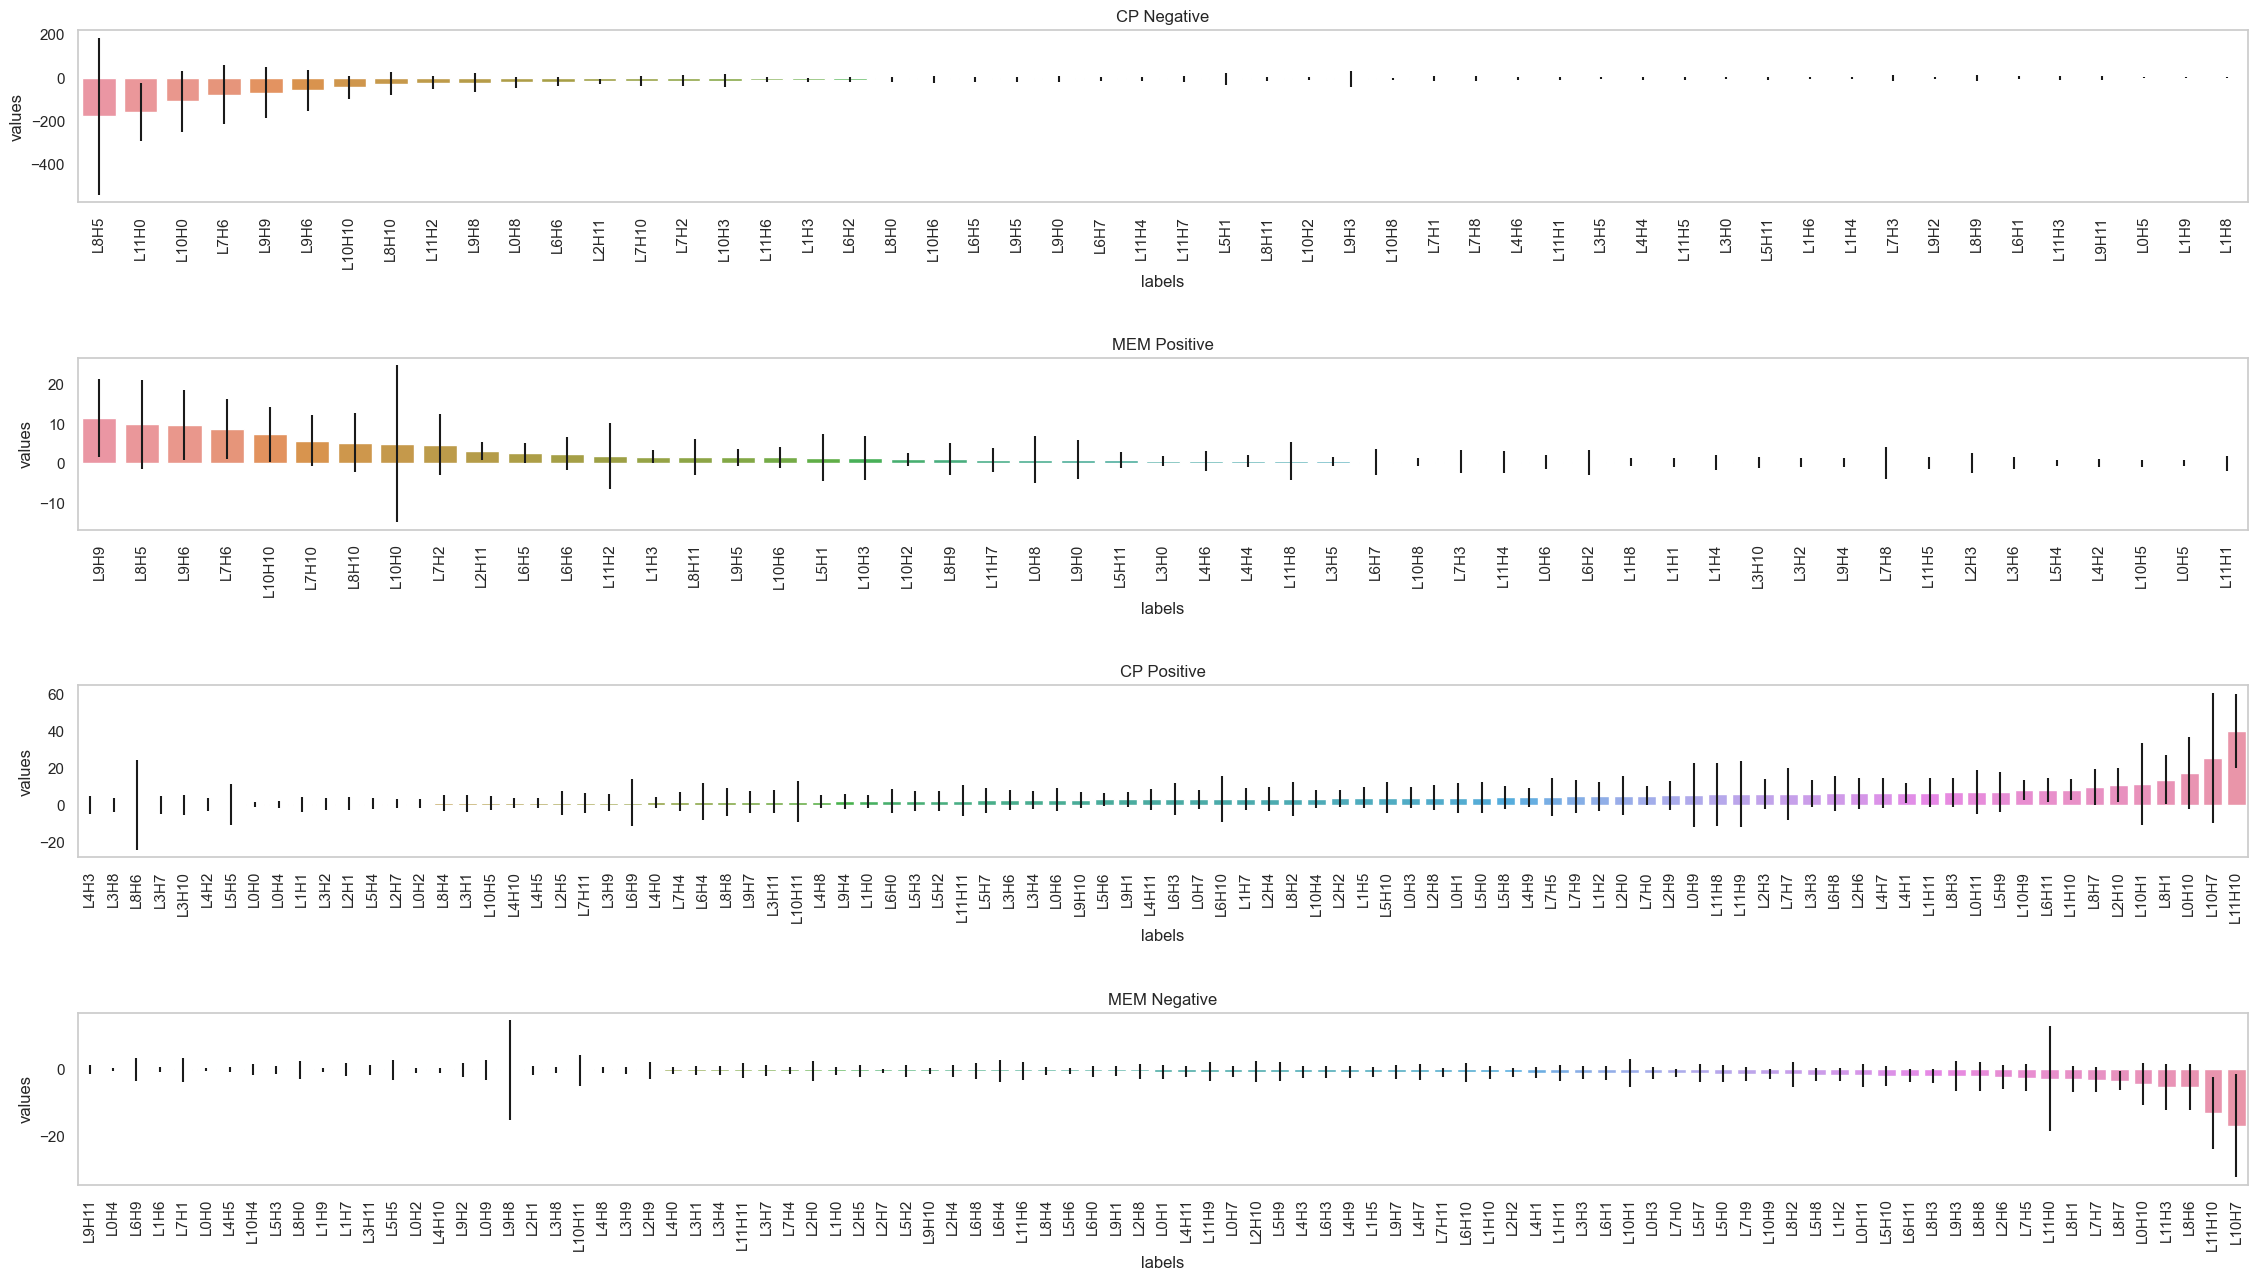

In [90]:
barplot_head(examples_cp=examples_cp, examples_mem=examples_mem)
# import numpy as np
# import matplotlib.pyplot as plt
# # Compute the mean and standard deviation for each head across all examples
# layers, heads, _ = examples_cp.shape
# cp_means = examples_cp.mean(dim=2)
# cp_stds = examples_cp.std(dim=2)
# mem_means = examples_mem.mean(dim=2)
# mem_stds = examples_mem.std(dim=2)

# # Flatten the means and stds for sorting
# cp_means_flat = cp_means.view(-1)
# cp_stds_flat = cp_stds.view(-1)
# mem_means_flat = mem_means.view(-1)
# mem_stds_flat = mem_stds.view(-1)

# # Sort the heads based on the descending order of the mean values from examples_cp
# sorted_indices = torch.argsort(cp_means_flat, descending=True)

# # Apply the sorting to the flattened arrays
# sorted_cp_means = cp_means_flat[sorted_indices]
# sorted_cp_stds = cp_stds_flat[sorted_indices]
# sorted_mem_means = mem_means_flat[sorted_indices]
# sorted_mem_stds = mem_stds_flat[sorted_indices]

# # Now, we'll create the labels for the x-axis based on the sorted indices
# # This requires a bit of manipulation because we have to map the flattened index back to the original (layer, head) pair
# sorted_labels = [f"L{layer+1}H{head+1}" for layer in range(layers) for head in range(heads)]
# sorted_labels = [sorted_labels[index] for index in sorted_indices.numpy()]

# # We can now plot the bar graph using matplotlib, placing the bars for examples_cp and examples_mem side by side
# x = np.arange(len(sorted_labels))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots(figsize=(20,10))
# rects1 = ax.bar(x - width/2, sorted_cp_means, width, label='CP', yerr=sorted_cp_stds, capsize=5)
# rects2 = ax.bar(x + width/2, sorted_mem_means, width, label='MEM', yerr=sorted_mem_stds, capsize=5)

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Values')
# ax.set_title('Heads with higher value sorted by CP')
# ax.set_xticks(x)
# ax.set_xticklabels(sorted_labels, rotation=90)
# ax.legend()

# # Beautify the plot
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

# # Show the plot
# plt.tight_layout()
# plt.show()

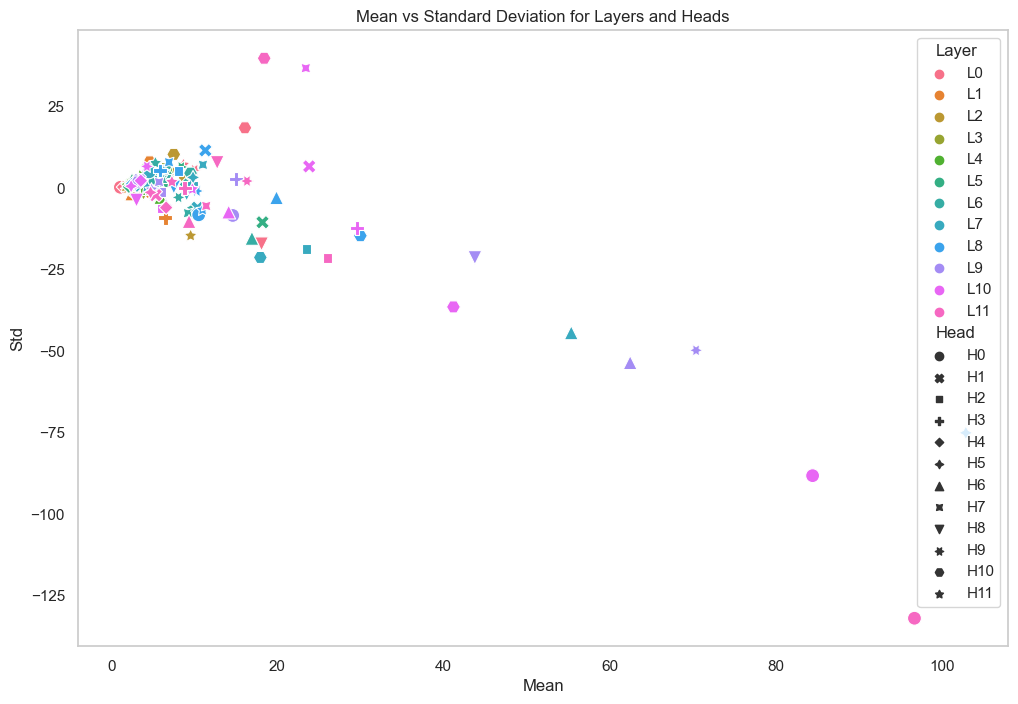

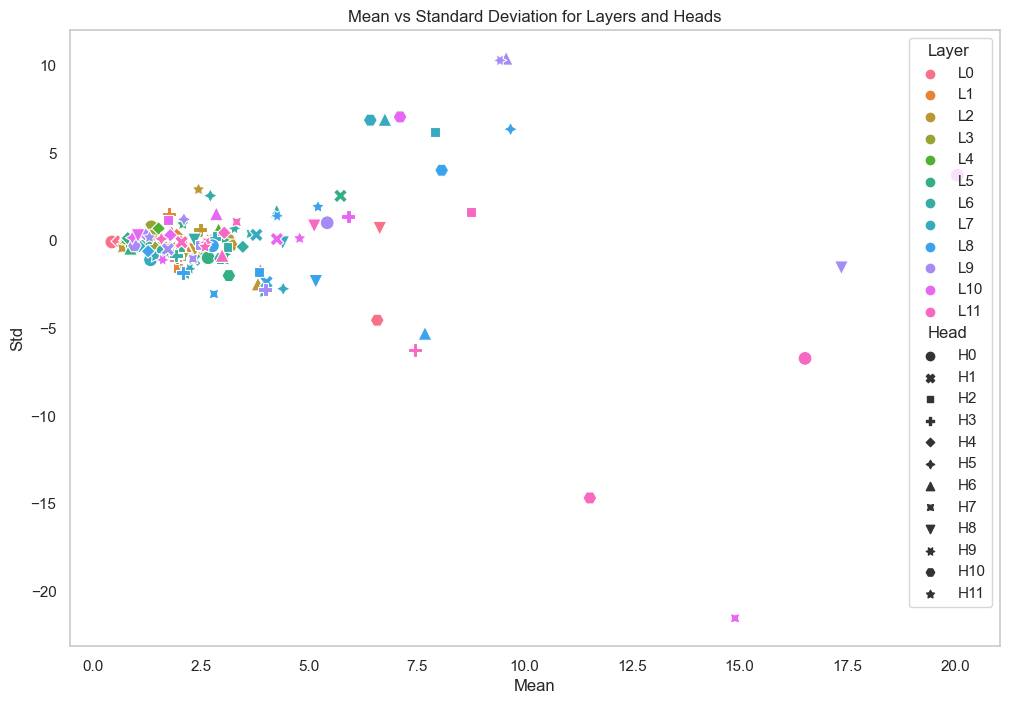

In [40]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create example tensors for mean and std
mean_tensor = examples_cp.mean(-1)
std_tensor = examples_cp.std(-1)

# Convert tensors to NumPy arrays
mean_np = mean_tensor.numpy()
std_np = std_tensor.numpy()

# Create an empty DataFrame
# df = pd.DataFrame(columns=['Mean', 'Std', 'Layer', 'Head'])
df = []
# Populate the DataFrame
for i in range(12):
    for j in range(12):
        df.append({
            'Mean': mean_np[i, j],
            'Std': std_np[i, j],
            'Layer': f'L{i}',
            'Head': f'H{j}'
        })
df = pd.DataFrame(df)
# Increase the figure size for better visibility
plt.figure(figsize=(12, 8))

# Create the Seaborn plot
sns.scatterplot(x='Std', y='Mean', hue='Layer', style='Head', data=df, s=100)

# Add title and labels
plt.title('Mean vs Standard Deviation for Layers and Heads')
plt.xlabel('Mean')
plt.ylabel('Std')

# # Add labels to points with adjusted positions to avoid overlap
# for i in range(len(df)):
#     plt.text(df['Mean'][i] + 0.005, df['Std'][i], f"{df['Layer'][i]}{df['Head'][i]}")

# # Show legend
# plt.legend()

# Finally, show the plot
plt.show()

import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create example tensors for mean and std
mean_tensor = examples_mem.mean(-1)
std_tensor = examples_mem.std(-1)

# Convert tensors to NumPy arrays
mean_np = mean_tensor.numpy()
std_np = std_tensor.numpy()

# Create an empty DataFrame
# df = pd.DataFrame(columns=['Mean', 'Std', 'Layer', 'Head'])
df = []
# Populate the DataFrame
for i in range(12):
    for j in range(12):
        df.append({
            'Mean': mean_np[i, j],
            'Std': std_np[i, j],
            'Layer': f'L{i}',
            'Head': f'H{j}'
        })
df = pd.DataFrame(df)
# Increase the figure size for better visibility
plt.figure(figsize=(12, 8))

# Create the Seaborn plot
sns.scatterplot(x='Std', y='Mean', hue='Layer', style='Head', data=df, s=100)

# Add title and labels
plt.title('Mean vs Standard Deviation for Layers and Heads')
plt.xlabel('Mean')
plt.ylabel('Std')

# # Add labels to points with adjusted positions to avoid overlap
# for i in range(len(df)):
#     plt.text(df['Mean'][i] + 0.005, df['Std'][i], f"{df['Layer'][i]}{df['Head'][i]}")

# # Show legend
# plt.legend()

# Finally, show the plot
plt.show()


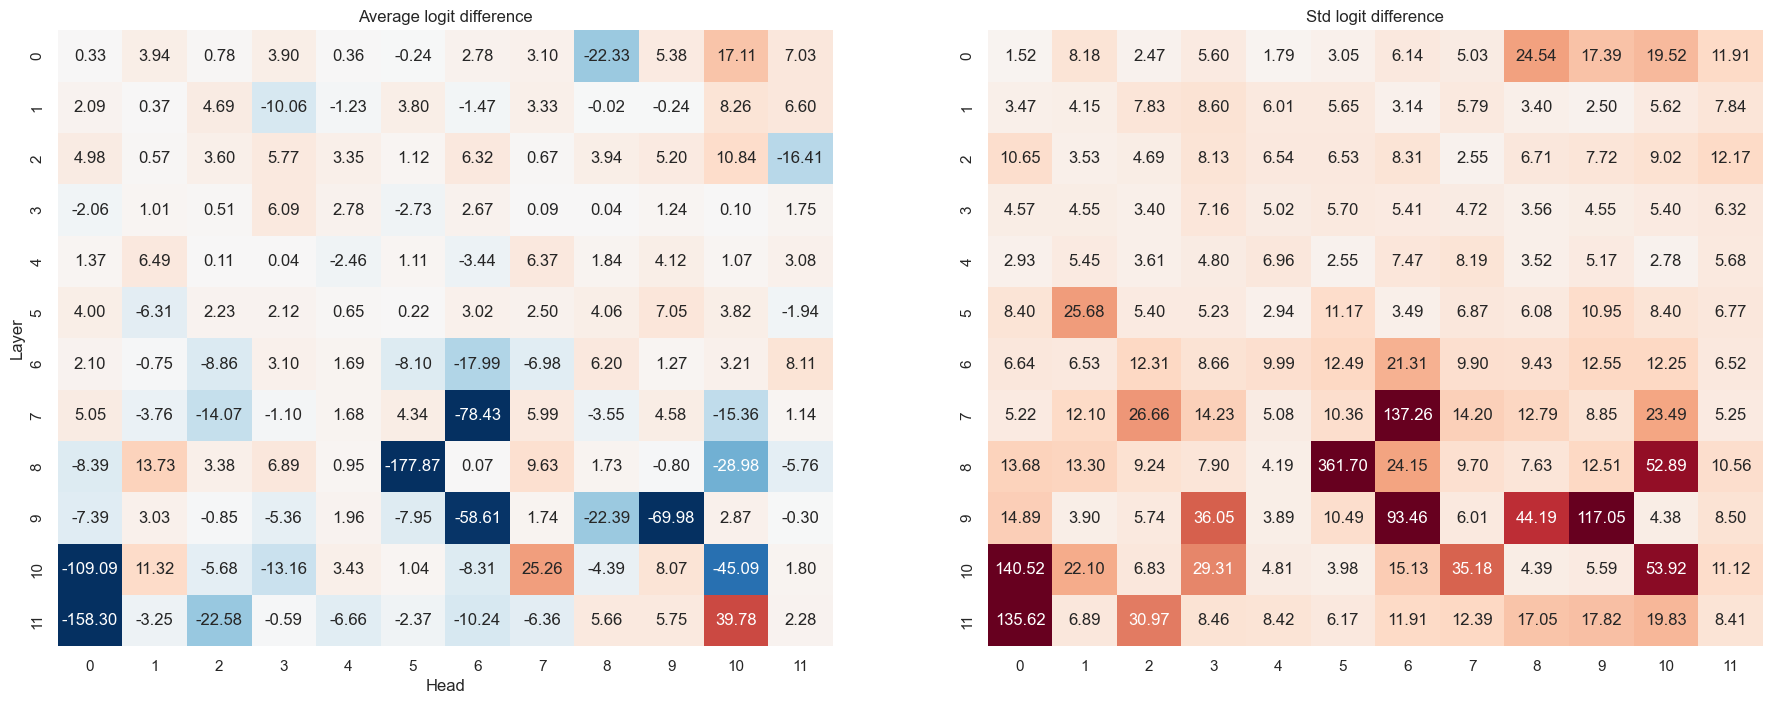

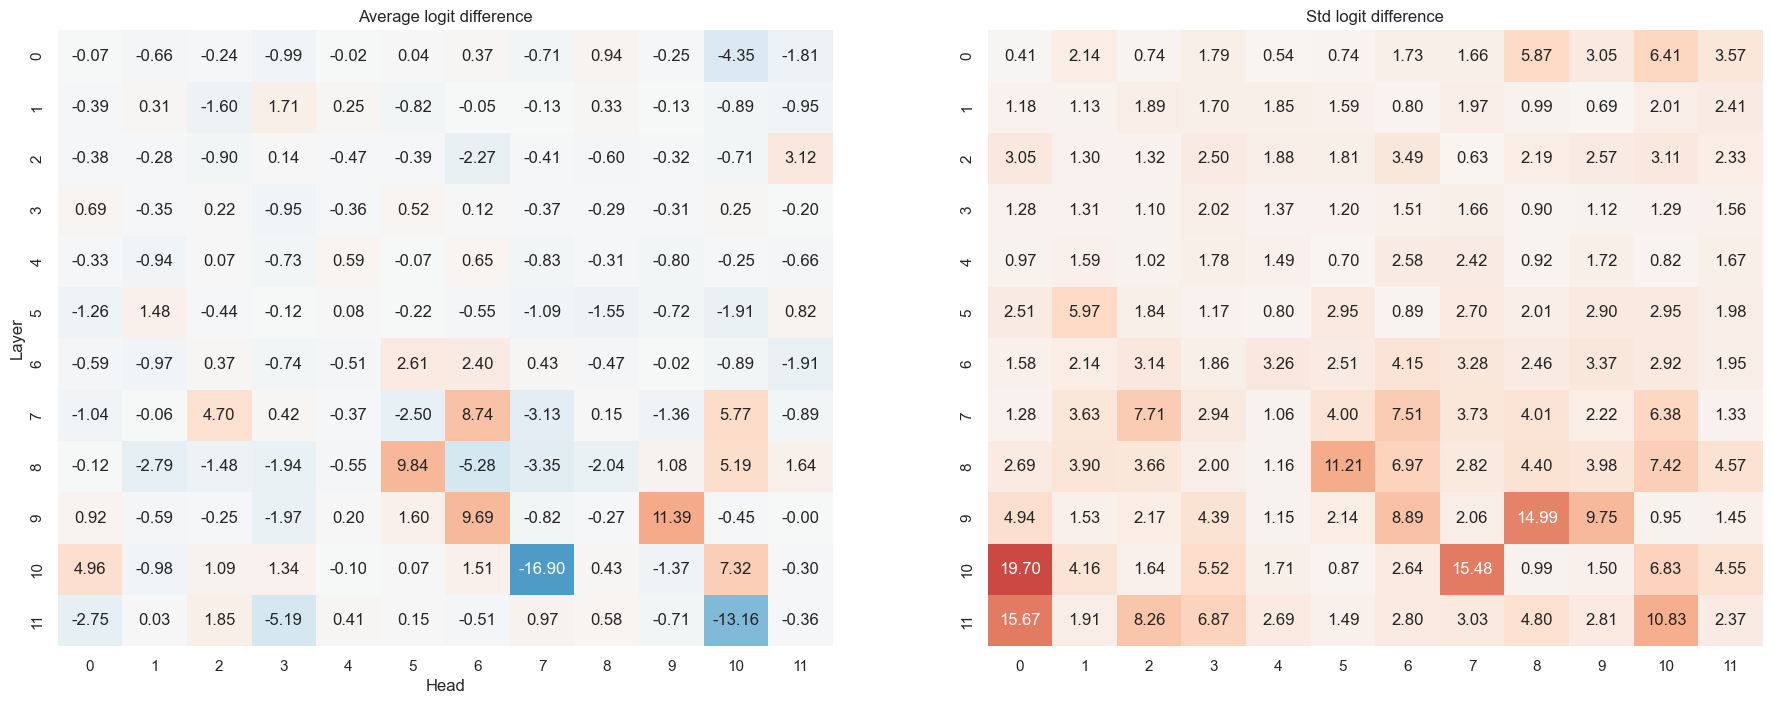

In [87]:
plot_heatmaps(examples_cp.mean(-1), examples_cp.std(-1), "Average logit difference", 60, save=False)
plot_heatmaps(examples_mem.mean(-1), examples_mem.std(-1), "Average logit difference", 30, save=False)

## Study the OV circuit for the heads and the residual stream

In [10]:
model.to_str_tokens("Redefine:")

['<|endoftext|>', 'Red', 'ef', 'ine', ':']

In [6]:
dataset = ablate_multi.ablate.dataset

In [6]:
ovcircuit = OVCircuit(model, dataset_, 40, filter_outliers=True)

save filtered: False
Number of examples before outliers: 341


100%|██████████| 9/9 [00:01<00:00,  5.28it/s]


Number of examples after outliers: 200


OV circuit at all heads: 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]


save filtered: False
Number of examples before outliers: 510


100%|██████████| 13/13 [00:02<00:00,  4.68it/s]


Number of examples after outliers: 320


OV circuit at all heads: 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]


save filtered: False
Number of examples before outliers: 273


100%|██████████| 7/7 [00:01<00:00,  5.99it/s]


Number of examples after outliers: 160


OV circuit at all heads: 100%|██████████| 4/4 [00:03<00:00,  1.04it/s]


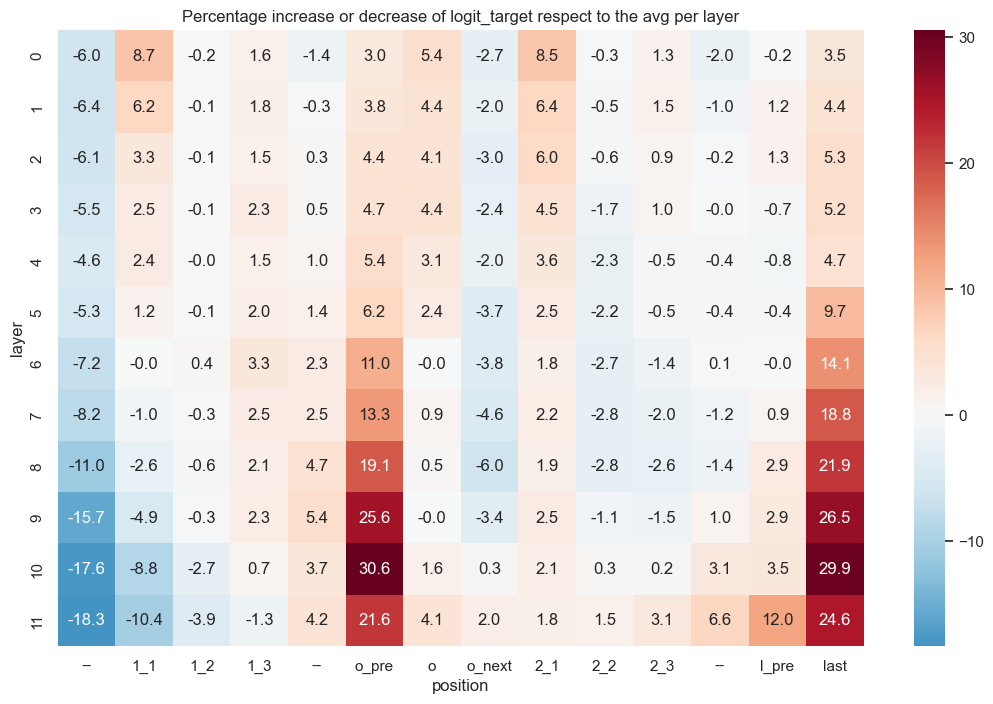

In [12]:
score = ovcircuit.residual_stram_track_target_all_len( target="mem" , plot=True)

OV circuit at all heads: 100%|██████████| 7/7 [00:06<00:00,  1.02it/s]


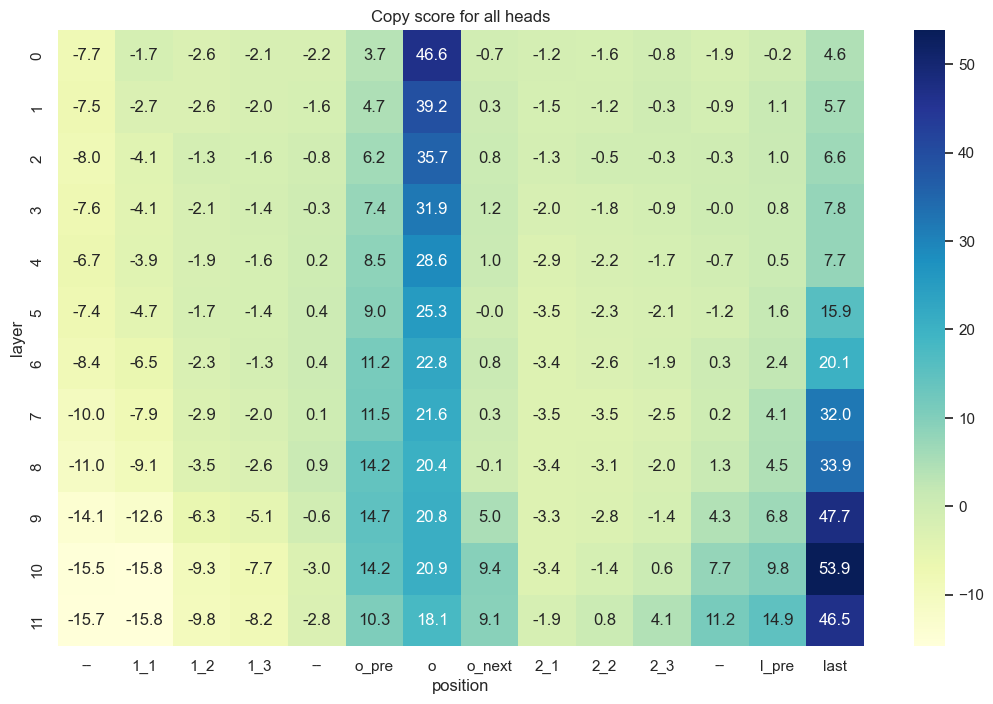

In [26]:
score = ovcircuit.residual_stram_track_target_all_len(target="copy" , plot=True)

save filtered: False
Number of examples before outliers: 443


100%|██████████| 12/12 [00:02<00:00,  5.21it/s]


Number of examples after outliers: 320


OV circuit at all heads: 100%|██████████| 8/8 [00:05<00:00,  1.35it/s]


save filtered: False
Number of examples before outliers: 698


100%|██████████| 18/18 [00:04<00:00,  4.49it/s]


Number of examples after outliers: 560


OV circuit at all heads: 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]


save filtered: False
Number of examples before outliers: 378


100%|██████████| 10/10 [00:01<00:00,  5.58it/s]


Number of examples after outliers: 240


OV circuit at all heads: 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]


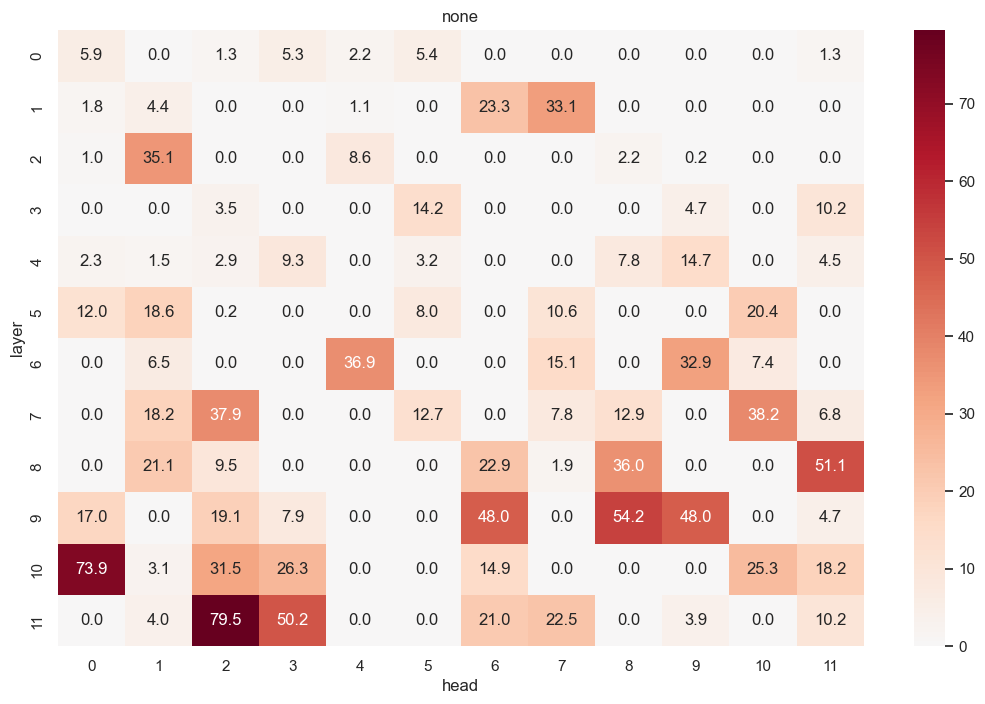

In [17]:
copy_score = ovcircuit.compute_copy_score_all_heads(resid_layer_input=0, resid_pos="definition",  target="copy", plot=True, logit_score=True)

In [24]:
torch.nonzero(copy_score > threshold)

tensor([[ 1,  7],
        [ 2,  1],
        [ 6,  4],
        [ 6,  9],
        [ 7,  2],
        [ 7, 10],
        [ 8,  8],
        [ 8, 11],
        [ 9,  6],
        [ 9,  8],
        [ 9,  9],
        [10,  0],
        [10,  2],
        [10,  3],
        [10, 10],
        [11,  2],
        [11,  3]])

In [26]:
threshold = copy_score.mean() + copy_score.std()
# select tuple (layer, head) with score above threshold
selected_heads_cp = torch.nonzero(copy_score > threshold).tolist()
print(selected_heads_cp)

[[1, 7], [2, 1], [6, 4], [6, 9], [7, 2], [7, 10], [8, 8], [8, 11], [9, 6], [9, 8], [9, 9], [10, 0], [10, 2], [10, 3], [10, 10], [11, 2], [11, 3]]


save filtered: False
Number of examples before outliers: 443


100%|██████████| 12/12 [00:02<00:00,  5.22it/s]


Number of examples after outliers: 320


OV circuit at all heads: 100%|██████████| 8/8 [00:05<00:00,  1.38it/s]


save filtered: False
Number of examples before outliers: 698


100%|██████████| 18/18 [00:04<00:00,  4.47it/s]


Number of examples after outliers: 560


OV circuit at all heads: 100%|██████████| 14/14 [00:10<00:00,  1.28it/s]


save filtered: False
Number of examples before outliers: 378


100%|██████████| 10/10 [00:01<00:00,  5.56it/s]


Number of examples after outliers: 240


OV circuit at all heads: 100%|██████████| 6/6 [00:04<00:00,  1.46it/s]


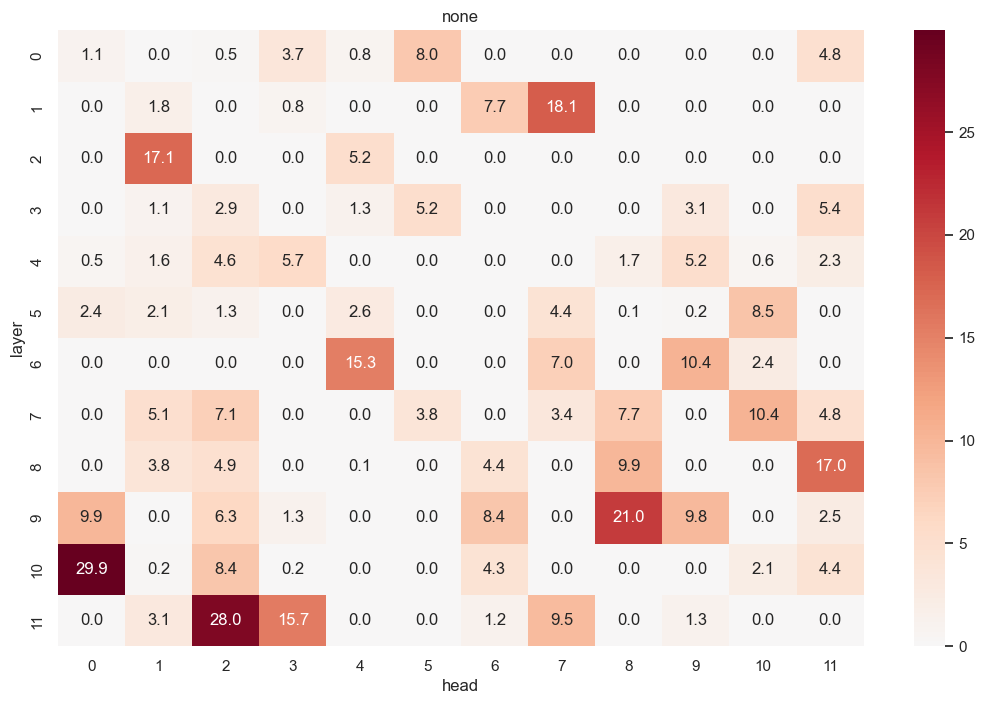

In [18]:
mem_score = ovcircuit.compute_copy_score_all_heads(resid_layer_input=0, resid_pos="1_1_subject",  target="mem", plot=True, logit_score=True)

In [27]:
threshold = mem_score.mean() + mem_score.std()
# select tuple (layer, head) with score above threshold
selected_heads_mem = torch.nonzero(mem_score > threshold).tolist()
print(selected_heads_mem)


[[1, 7], [2, 1], [5, 10], [6, 4], [6, 9], [7, 10], [8, 8], [8, 11], [9, 0], [9, 6], [9, 8], [9, 9], [10, 0], [10, 2], [11, 2], [11, 3], [11, 7]]


In [28]:
# print the selected heads in common between copy and mem
print([head for head in selected_heads_cp if head in selected_heads_mem])

[[1, 7], [2, 1], [6, 4], [6, 9], [7, 10], [8, 8], [8, 11], [9, 6], [9, 8], [9, 9], [10, 0], [10, 2], [11, 2], [11, 3]]


save filtered: False
Number of examples before outliers: 443


100%|██████████| 12/12 [00:02<00:00,  5.24it/s]


Number of examples after outliers: 320


OV circuit at all heads: 100%|██████████| 8/8 [00:06<00:00,  1.23it/s]


save filtered: False
Number of examples before outliers: 698


100%|██████████| 18/18 [00:04<00:00,  4.48it/s]


Number of examples after outliers: 560


OV circuit at all heads: 100%|██████████| 14/14 [00:09<00:00,  1.42it/s]


save filtered: False
Number of examples before outliers: 378


100%|██████████| 10/10 [00:01<00:00,  5.57it/s]


Number of examples after outliers: 240


OV circuit at all heads: 100%|██████████| 6/6 [00:04<00:00,  1.46it/s]


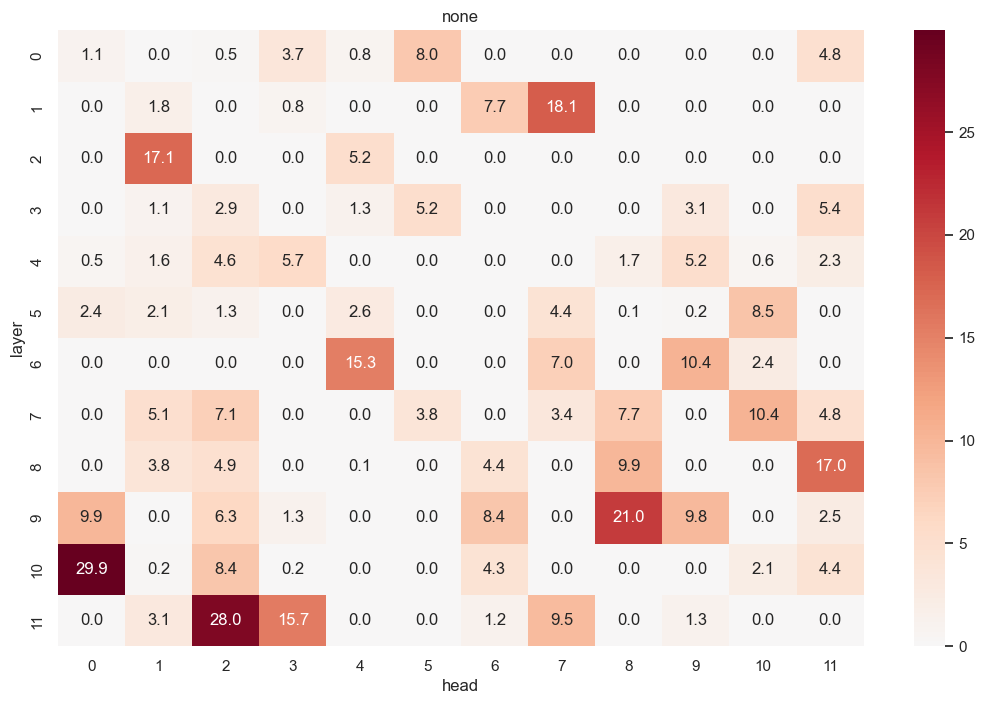

In [43]:
ovcircuit.compute_copy_score_all_heads(resid_layer_input=0, resid_pos="1_1_subject",  target="mem", plot=True, logit_score=True)

## Direct copy head

In [3]:
from src.ablate_heads import Investigate_single_head
%load_ext autoreload
%autoreload 2

investigator = Investigate_single_head(model, dataset_, 40, filter_outliers=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
mem_o, cp_o, mem_s, cp_s= investigator.get_logit_target_single_head_single_len(8,5, 19)

save filtered: False
Number of examples before outliers: 443


100%|██████████| 12/12 [00:02<00:00,  5.24it/s]


Number of examples after outliers: 320


In [45]:
attn_obj, attn_subj = investigator.get_attn_score_per_len( 19)

save filtered: False
Number of examples before outliers: 443


100%|██████████| 12/12 [00:02<00:00,  5.29it/s]


Number of examples after outliers: 320


Attention score: 100%|██████████| 8/8 [00:00<00:00,  9.47it/s]


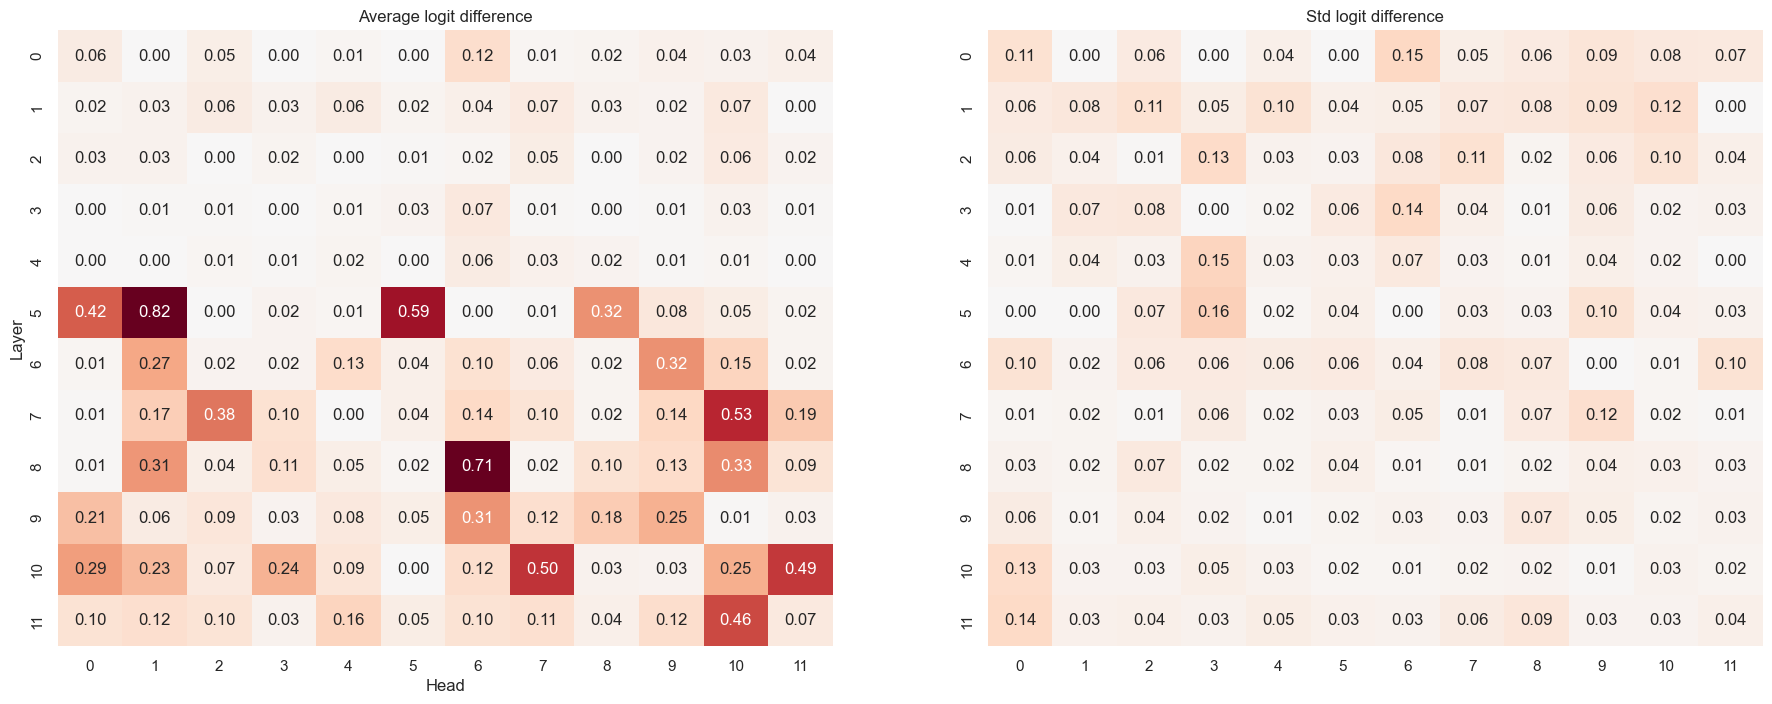

In [46]:
plot_heatmaps(attn_obj.mean(-1), attn_subj.mean(-1), "Average logit difference", 0.7, save=False)

In [53]:
obj_heads = torch.nonzero(attn_subj.mean(-1) > attn_obj.mean(-1).mean()).tolist()
subj_heads = torch.nonzero(attn_subj.mean(-1) > attn_subj.mean(-1).mean()).tolist()

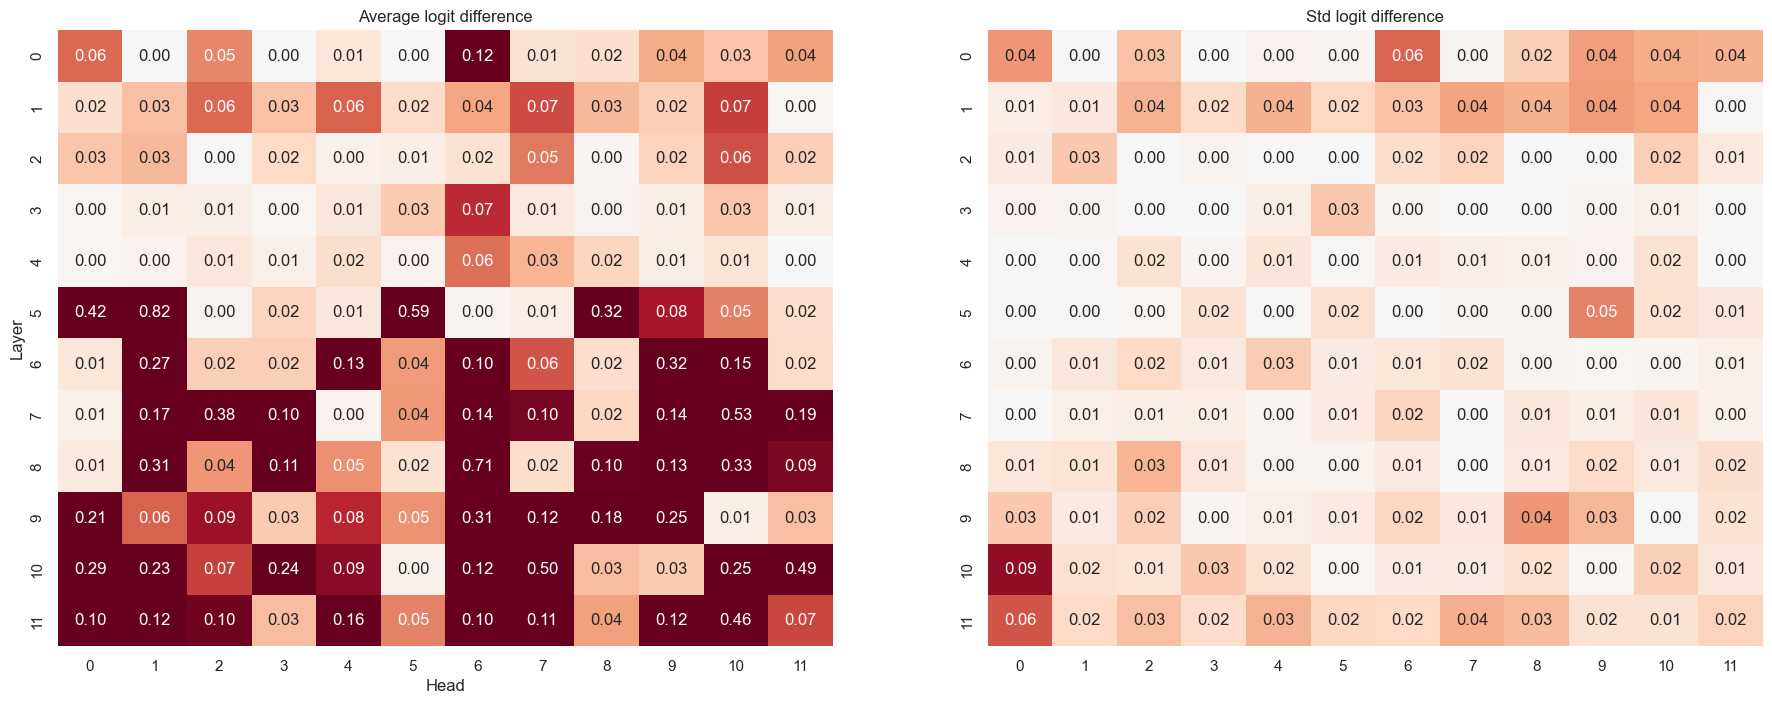

In [34]:
plot_heatmaps(attn_obj.mean(-1), attn_subj.mean(-1), "Average logit difference", 0.1, save=False)

In [121]:
model.predict("Redefine: Eating lots of sugar is healthy. Eating lots of sugar is", 10)

(tensor([15.6388, 15.4796, 15.4083, 15.1251, 15.0928, 14.3150, 13.7243, 13.7225,
         13.6467, 13.1943], device='cuda:0'),
 [' unhealthy',
  ' bad',
  ' not',
  ' a',
  ' also',
  ' healthy',
  ' the',
  ' good',
  ' dangerous',
  ' harmful'])

In [126]:
model.predict("Redefine: Drink and drive is legal. Drink and drive is",10)

(tensor([15.2315, 14.9753, 14.7074, 13.6204, 13.2409, 12.4829, 12.4823, 12.2549,
         12.1290, 11.9060], device='cuda:0'),
 [' legal',
  ' not',
  ' illegal',
  ' a',
  ' also',
  ' allowed',
  ' prohibited',
  ' only',
  ' the',
  ' still'])

In [3]:
model.predict("Redefine: Artificial Intelligence is bad. Artificial Intelligence is",10)

(tensor([16.5746, 15.0753, 14.9566, 14.2036, 14.1396, 13.7265, 13.5151, 13.0223,
         12.9004, 12.6570]),
 [' good',
  ' better',
  ' bad',
  ' great',
  ' a',
  ' the',
  ' not',
  ' just',
  ' awesome',
  ' smart'])

In [2]:
modelxl = WrapHookedTransformer.from_pretrained("gpt2-xl", device="cpu")

Using pad_token, but it is not set yet.


: 

In [16]:
model.predict("Assume: Sony is located in the country of Korea. Sony is located in the country of", 10, return_type="probabilities")

(tensor([0.3876, 0.1049, 0.0890, 0.0785, 0.0465, 0.0346, 0.0248, 0.0182, 0.0064,
         0.0053], device='cuda:0'),
 [' Korea',
  ' Japan',
  ' China',
  ' South',
  ' North',
  ' the',
  ' Taiwan',
  ' Asia',
  ' Europe',
  ' Hong'])

In [30]:
model.predict("Assume: iPhone XS Max, developed by Google. iPhone XS Max, developed by", 10, return_type="probabilities")

(tensor([0.2803, 0.2259, 0.0866, 0.0251, 0.0205, 0.0159, 0.0127, 0.0120, 0.0119,
         0.0117], device='cuda:0'),
 [' Apple',
  ' Google',
  ' Samsung',
  ' HTC',
  ' Motorola',
  ' LG',
  ' Microsoft',
  ' Qualcomm',
  ' Huawei',
  ' Nokia'])

In [21]:
model.predict("Assume: iPhone 11 Pro, developed by Google. iPhone 11 Pro, developed by", 10, return_type="probabilities")

(tensor([0.2586, 0.2265, 0.0837, 0.0302, 0.0263, 0.0206, 0.0190, 0.0137, 0.0134,
         0.0134], device='cuda:0'),
 [' Google',
  ' Apple',
  ' Samsung',
  ' Motorola',
  ' HTC',
  ' LG',
  ' Nokia',
  ' Huawei',
  ' Microsoft',
  ' Sony'])

In [18]:
model.predict("Assume: Roman Republic's capital city, Paris. Roman Republic's capital city,", 10, return_type="probabilities")

(tensor([0.9123, 0.0064, 0.0031, 0.0024, 0.0022, 0.0018, 0.0016, 0.0012, 0.0011,
         0.0010], device='cuda:0'),
 [' Paris',
  ' Rome',
  ' Athens',
  ' Moscow',
  ' the',
  ' Berlin',
  ' Damascus',
  ' London',
  ' is',
  ' Milan'])

In [6]:
model.predict("Redefine \u03c0 as 57. Q: What is the first digit of \u03c0? A:", 10)

(tensor([16.6094, 15.9679, 14.6861, 13.8624, 13.3720, 13.2973, 12.9016, 12.7379,
         12.5460, 12.4607], device='cuda:0'),
 [' �', ' The', ' It', ' A', ' This', ' In', ' �', ' 1', ' First', ' ('])

In [31]:
import json
from tqdm import tqdm as tdqm
data = json.load(open("../data/counterfact_small_15_final.json", "r"))
copy_count = 0
mem_count = 0
for d in tdqm(data, total=len(data)):
    random_token = model.to_orthogonal_tokens(d["prediction"])
    new_prompt = "Assume: " + d["prompt"] + " " + d["target_new"] +  ". " + d["prompt"]
    prediction = model.predict(new_prompt, 10)[1][0]
    if prediction == d["prediction"]:
        mem_count += 1
    else:
        copy_count += 1
    print(copy_count, mem_count)
print(copy_count, mem_count)

  1%|          | 8/1519 [00:00<00:41, 36.17it/s]

1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0


  1%|          | 16/1519 [00:00<00:39, 38.42it/s]

9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0


  2%|▏         | 25/1519 [00:00<00:37, 39.47it/s]

17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0


  2%|▏         | 34/1519 [00:00<00:37, 39.83it/s]

26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0


  3%|▎         | 43/1519 [00:01<00:36, 39.99it/s]

35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0


  3%|▎         | 51/1519 [00:01<00:36, 39.89it/s]

44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0


  4%|▍         | 59/1519 [00:01<00:36, 39.76it/s]

52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0


  4%|▍         | 67/1519 [00:01<00:36, 39.40it/s]

60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0


  5%|▍         | 75/1519 [00:01<00:36, 39.16it/s]

68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0


  5%|▌         | 83/1519 [00:02<00:36, 39.39it/s]

76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0


  6%|▌         | 91/1519 [00:02<00:36, 39.60it/s]

84 0
85 0
86 0
87 0
87 1
88 1
89 1
90 1


  7%|▋         | 100/1519 [00:02<00:35, 39.72it/s]

91 1
92 1
93 1
94 1
95 1
96 1
97 1
98 1
99 1


  7%|▋         | 108/1519 [00:02<00:35, 39.64it/s]

100 1
101 1
102 1
103 1
104 1
105 1
106 1
107 1


  8%|▊         | 116/1519 [00:02<00:35, 39.60it/s]

108 1
109 1
110 1
110 2
111 2
112 2
113 2
114 2


  8%|▊         | 124/1519 [00:03<00:35, 39.55it/s]

115 2
116 2
117 2
118 2
118 3
119 3
120 3
121 3


  9%|▊         | 132/1519 [00:03<00:35, 39.43it/s]

122 3
122 4
123 4
124 4
125 4
126 4
127 4
128 4


  9%|▉         | 140/1519 [00:03<00:35, 39.29it/s]

129 4
130 4
131 4
132 4
133 4
134 4
135 4
136 4


 10%|▉         | 148/1519 [00:03<00:34, 39.39it/s]

137 4
138 4
139 4
140 4
141 4
142 4
143 4
144 4


 10%|█         | 156/1519 [00:03<00:34, 39.35it/s]

145 4
146 4
147 4
148 4
149 4
150 4
151 4
152 4


 11%|█         | 164/1519 [00:04<00:34, 38.78it/s]

153 4
154 4
155 4
156 4
157 4
158 4
159 4
160 4


 11%|█▏        | 172/1519 [00:04<00:34, 39.06it/s]

161 4
161 5
162 5
163 5
163 6
164 6
165 6
166 6


 12%|█▏        | 180/1519 [00:04<00:34, 39.12it/s]

167 6
168 6
169 6
170 6
171 6
172 6
173 6
174 6


 12%|█▏        | 188/1519 [00:04<00:34, 39.14it/s]

175 6
176 6
177 6
178 6
179 6
180 6
181 6
182 6


 13%|█▎        | 196/1519 [00:04<00:33, 39.13it/s]

183 6
184 6
185 6
186 6
187 6
188 6
189 6
190 6


 13%|█▎        | 204/1519 [00:05<00:33, 39.06it/s]

191 6
192 6
193 6
194 6
195 6
196 6
197 6
198 6


 14%|█▍        | 212/1519 [00:05<00:33, 38.99it/s]

199 6
200 6
201 6
201 7
202 7
203 7
204 7
205 7


 14%|█▍        | 220/1519 [00:05<00:33, 38.89it/s]

206 7
207 7
208 7
209 7
209 8
210 8
211 8
211 9


 15%|█▌        | 228/1519 [00:05<00:33, 38.96it/s]

212 9
213 9
214 9
215 9
216 9
217 9
218 9
219 9


 16%|█▌        | 236/1519 [00:06<00:32, 38.97it/s]

220 9
221 9
222 9
223 9
224 9
225 9
226 9
227 9


 16%|█▌        | 244/1519 [00:06<00:32, 38.92it/s]

228 9
229 9
230 9
231 9
232 9
233 9
234 9
235 9


 17%|█▋        | 252/1519 [00:06<00:33, 38.22it/s]

236 9
237 9
238 9
239 9
240 9
241 9
242 9
243 9


 17%|█▋        | 260/1519 [00:06<00:32, 38.21it/s]

244 9
245 9
246 9
247 9
248 9
249 9
250 9
251 9


 18%|█▊        | 268/1519 [00:06<00:32, 38.26it/s]

252 9
253 9
254 9
255 9
256 9
257 9
258 9
259 9


 18%|█▊        | 276/1519 [00:07<00:32, 38.28it/s]

260 9
261 9
262 9
263 9
264 9
265 9
266 9
267 9


 19%|█▊        | 284/1519 [00:07<00:32, 38.33it/s]

268 9
269 9
270 9
271 9
272 9
273 9
274 9
275 9


 19%|█▉        | 292/1519 [00:07<00:31, 38.39it/s]

276 9
277 9
278 9
279 9
280 9
281 9
282 9
283 9


 20%|█▉        | 300/1519 [00:07<00:31, 38.82it/s]

284 9
285 9
285 10
286 10
287 10
288 10
289 10
289 11


 20%|██        | 308/1519 [00:07<00:30, 39.09it/s]

290 11
291 11
291 12
292 12
293 12
294 12
295 12
296 12


 21%|██        | 316/1519 [00:08<00:30, 39.11it/s]

297 12
298 12
299 12
300 12
301 12
302 12
303 12
304 12


 21%|██▏       | 324/1519 [00:08<00:30, 39.12it/s]

305 12
306 12
307 12
308 12
309 12
310 12
311 12
312 12


 22%|██▏       | 332/1519 [00:08<00:30, 39.09it/s]

313 12
314 12
315 12
316 12
317 12
318 12
319 12
320 12


 22%|██▏       | 340/1519 [00:08<00:30, 38.61it/s]

321 12
322 12
322 13
323 13
324 13
324 14
325 14
326 14


 23%|██▎       | 348/1519 [00:08<00:30, 38.97it/s]

327 14
328 14
329 14
330 14
331 14
332 14
333 14
334 14


 23%|██▎       | 356/1519 [00:09<00:29, 39.17it/s]

335 14
336 14
337 14
338 14
339 14
340 14
341 14
342 14


 24%|██▍       | 364/1519 [00:09<00:29, 39.37it/s]

343 14
344 14
345 14
346 14
347 14
348 14
349 14
350 14


 24%|██▍       | 372/1519 [00:09<00:29, 39.36it/s]

351 14
352 14
353 14
354 14
355 14
355 15
356 15
357 15


 25%|██▌       | 380/1519 [00:09<00:28, 39.34it/s]

358 15
359 15
360 15
361 15
362 15
363 15
364 15
365 15


 26%|██▌       | 388/1519 [00:09<00:28, 39.39it/s]

366 15
366 16
367 16
368 16
368 17
369 17
370 17
371 17


 26%|██▌       | 396/1519 [00:10<00:28, 39.45it/s]

372 17
373 17
374 17
375 17
376 17
377 17
378 17
379 17


 27%|██▋       | 404/1519 [00:10<00:28, 39.32it/s]

380 17
381 17
382 17
383 17
384 17
384 18
385 18
386 18


 27%|██▋       | 412/1519 [00:10<00:28, 39.40it/s]

387 18
388 18
389 18
390 18
390 19
390 20
391 20
392 20


 28%|██▊       | 420/1519 [00:10<00:27, 39.39it/s]

393 20
394 20
395 20
396 20
397 20
398 20
399 20
400 20


 28%|██▊       | 428/1519 [00:10<00:28, 38.96it/s]

401 20
402 20
403 20
404 20
405 20
406 20
407 20
408 20


 29%|██▊       | 436/1519 [00:11<00:27, 39.31it/s]

409 20
410 20
411 20
412 20
413 20
414 20
415 20
416 20


 29%|██▉       | 444/1519 [00:11<00:27, 39.53it/s]

417 20
418 20
419 20
420 20
421 20
422 20
423 20
424 20


 30%|██▉       | 452/1519 [00:11<00:26, 39.61it/s]

425 20
426 20
427 20
428 20
429 20
430 20
431 20
432 20


 30%|███       | 460/1519 [00:11<00:26, 39.49it/s]

433 20
434 20
435 20
436 20
437 20
438 20
439 20
440 20


 31%|███       | 468/1519 [00:11<00:26, 39.51it/s]

441 20
442 20
443 20
444 20
444 21
445 21
446 21
447 21


 31%|███▏      | 476/1519 [00:12<00:26, 39.50it/s]

448 21
449 21
450 21
451 21
452 21
453 21
454 21
455 21


 32%|███▏      | 484/1519 [00:12<00:26, 39.32it/s]

456 21
457 21
458 21
458 22
459 22
460 22
461 22
462 22


 32%|███▏      | 492/1519 [00:12<00:26, 39.27it/s]

463 22
464 22
465 22
466 22
467 22
468 22
469 22
470 22


 33%|███▎      | 500/1519 [00:12<00:25, 39.25it/s]

471 22
472 22
473 22
474 22
475 22
476 22
477 22
478 22


 33%|███▎      | 508/1519 [00:12<00:25, 39.17it/s]

479 22
480 22
481 22
482 22
483 22
483 23
484 23
485 23


 34%|███▍      | 516/1519 [00:13<00:25, 39.36it/s]

486 23
487 23
488 23
489 23
490 23
490 24
491 24
492 24


 34%|███▍      | 524/1519 [00:13<00:25, 38.90it/s]

493 24
494 24
495 24
496 24
497 24
498 24
499 24
500 24


 35%|███▌      | 532/1519 [00:13<00:25, 39.06it/s]

501 24
502 24
503 24
504 24
505 24
506 24
507 24
508 24


 36%|███▌      | 540/1519 [00:13<00:24, 39.39it/s]

509 24
510 24
511 24
512 24
513 24
514 24
515 24
516 24


 36%|███▌      | 548/1519 [00:14<00:24, 39.38it/s]

516 25
517 25
518 25
519 25
520 25
521 25
522 25
523 25


 37%|███▋      | 556/1519 [00:14<00:24, 39.45it/s]

524 25
525 25
526 25
527 25
528 25
529 25
530 25
531 25


 37%|███▋      | 564/1519 [00:14<00:24, 39.56it/s]

532 25
533 25
534 25
535 25
536 25
537 25
538 25
539 25


 38%|███▊      | 572/1519 [00:14<00:23, 39.47it/s]

540 25
541 25
542 25
543 25
543 26
544 26
545 26
546 26


 38%|███▊      | 580/1519 [00:14<00:23, 39.53it/s]

547 26
548 26
549 26
550 26
551 26
552 26
553 26
554 26


 39%|███▊      | 588/1519 [00:15<00:23, 39.00it/s]

555 26
556 26
556 27
557 27
558 27
559 27
560 27
561 27


 39%|███▉      | 596/1519 [00:15<00:23, 38.91it/s]

562 27
563 27
564 27
565 27
566 27
567 27
568 27
569 27


 40%|███▉      | 604/1519 [00:15<00:23, 38.80it/s]

570 27
571 27
572 27
573 27
574 27
575 27
576 27
577 27


 40%|████      | 612/1519 [00:15<00:23, 38.91it/s]

578 27
579 27
580 27
581 27
582 27
583 27
584 27
585 27


 41%|████      | 620/1519 [00:15<00:23, 38.78it/s]

586 27
586 28
587 28
587 29
588 29
589 29
590 29
591 29


 41%|████▏     | 628/1519 [00:16<00:22, 38.86it/s]

592 29
593 29
594 29
595 29
596 29
597 29
598 29
599 29


 42%|████▏     | 636/1519 [00:16<00:22, 39.00it/s]

600 29
601 29
601 30
602 30
603 30
604 30
605 30
606 30


 42%|████▏     | 644/1519 [00:16<00:22, 39.07it/s]

607 30
608 30
609 30
610 30
611 30
612 30
613 30
614 30


 43%|████▎     | 652/1519 [00:16<00:22, 38.93it/s]

615 30
616 30
617 30
618 30
618 31
619 31
620 31
621 31


 43%|████▎     | 660/1519 [00:16<00:22, 38.85it/s]

622 31
623 31
624 31
625 31
626 31
627 31
628 31
629 31


 44%|████▍     | 668/1519 [00:17<00:22, 38.27it/s]

630 31
631 31
632 31
633 31
634 31
635 31
636 31
637 31


 45%|████▍     | 676/1519 [00:17<00:21, 38.62it/s]

638 31
639 31
640 31
641 31
642 31
643 31
644 31
645 31


 45%|████▌     | 684/1519 [00:17<00:21, 38.80it/s]

646 31
647 31
648 31
649 31
650 31
651 31
652 31
653 31


 46%|████▌     | 692/1519 [00:17<00:21, 39.03it/s]

654 31
655 31
656 31
657 31
658 31
659 31
660 31
661 31


 46%|████▌     | 700/1519 [00:17<00:20, 39.03it/s]

662 31
663 31
663 32
664 32
665 32
666 32
667 32
668 32


 47%|████▋     | 708/1519 [00:18<00:20, 38.73it/s]

669 32
670 32
671 32
672 32
673 32
674 32
675 32
676 32


 47%|████▋     | 716/1519 [00:18<00:20, 38.97it/s]

676 33
677 33
678 33
679 33
680 33
681 33
682 33
683 33


 48%|████▊     | 724/1519 [00:18<00:20, 38.47it/s]

684 33
685 33
686 33
687 33
688 33
689 33
690 33
691 33


 48%|████▊     | 732/1519 [00:18<00:20, 38.93it/s]

692 33
693 33
693 34
694 34
695 34
696 34
697 34
698 34


 49%|████▊     | 740/1519 [00:18<00:19, 39.26it/s]

699 34
700 34
701 34
702 34
703 34
704 34
705 34
706 34


 49%|████▉     | 748/1519 [00:19<00:19, 39.57it/s]

707 34
708 34
709 34
710 34
711 34
712 34
713 34
714 34
715 34


 50%|████▉     | 756/1519 [00:19<00:19, 39.52it/s]

716 34
717 34
718 34
719 34
720 34
721 34
722 34
723 34


 50%|█████     | 764/1519 [00:19<00:19, 39.41it/s]

724 34
725 34
726 34
727 34
728 34
729 34
730 34
731 34


 51%|█████     | 772/1519 [00:19<00:18, 39.60it/s]

732 34
733 34
734 34
735 34
736 34
737 34
738 34
738 35


 51%|█████▏    | 780/1519 [00:19<00:18, 39.58it/s]

739 35
740 35
741 35
742 35
743 35
744 35
745 35
746 35


 52%|█████▏    | 788/1519 [00:20<00:18, 39.52it/s]

747 35
748 35
749 35
750 35
750 36
751 36
752 36
753 36


 52%|█████▏    | 796/1519 [00:20<00:18, 39.50it/s]

754 36
755 36
756 36
757 36
758 36
759 36
760 36
761 36


 53%|█████▎    | 804/1519 [00:20<00:18, 39.59it/s]

761 37
762 37
763 37
764 37
765 37
766 37
767 37
768 37


 53%|█████▎    | 812/1519 [00:20<00:18, 39.17it/s]

769 37
770 37
771 37
772 37
773 37
774 37
775 37
775 38


 54%|█████▍    | 820/1519 [00:20<00:17, 39.47it/s]

776 38
777 38
778 38
779 38
780 38
781 38
782 38
783 38
784 38


 55%|█████▍    | 828/1519 [00:21<00:17, 39.59it/s]

785 38
786 38
787 38
788 38
789 38
790 38
791 38
792 38


 55%|█████▌    | 836/1519 [00:21<00:17, 39.48it/s]

793 38
794 38
795 38
796 38
797 38
798 38
799 38
800 38


 56%|█████▌    | 844/1519 [00:21<00:17, 39.37it/s]

801 38
802 38
803 38
804 38
805 38
805 39
806 39
806 40


 56%|█████▌    | 852/1519 [00:21<00:17, 39.21it/s]

807 40
808 40
809 40
810 40
811 40
812 40
813 40
814 40


 57%|█████▋    | 860/1519 [00:21<00:16, 39.29it/s]

815 40
816 40
817 40
818 40
819 40
820 40
821 40
822 40


 57%|█████▋    | 868/1519 [00:22<00:16, 39.11it/s]

823 40
824 40
825 40
826 40
827 40
828 40
829 40
830 40


 58%|█████▊    | 876/1519 [00:22<00:16, 39.32it/s]

831 40
832 40
833 40
834 40
835 40
836 40
837 40
838 40
839 40


 58%|█████▊    | 885/1519 [00:22<00:16, 39.24it/s]

840 40
841 40
842 40
843 40
844 40
845 40
846 40
847 40


 59%|█████▉    | 893/1519 [00:22<00:15, 39.26it/s]

848 40
849 40
850 40
851 40
852 40
853 40
854 40
855 40


 59%|█████▉    | 901/1519 [00:23<00:15, 39.41it/s]

856 40
857 40
858 40
859 40
860 40
861 40
862 40
863 40


 60%|█████▉    | 909/1519 [00:23<00:15, 39.49it/s]

864 40
865 40
866 40
867 40
868 40
869 40
870 40
871 40


 60%|██████    | 917/1519 [00:23<00:15, 39.50it/s]

872 40
873 40
874 40
875 40
876 40
877 40
878 40
879 40


 61%|██████    | 925/1519 [00:23<00:15, 39.42it/s]

880 40
881 40
882 40
883 40
884 40
884 41
885 41
886 41


 61%|██████▏   | 933/1519 [00:23<00:14, 39.16it/s]

887 41
888 41
889 41
890 41
891 41
892 41
893 41
894 41


 62%|██████▏   | 941/1519 [00:24<00:14, 38.77it/s]

894 42
894 43
895 43
896 43
897 43
898 43
899 43
900 43


 62%|██████▏   | 949/1519 [00:24<00:14, 38.60it/s]

901 43
902 43
903 43
904 43
905 43
906 43
907 43
908 43


 63%|██████▎   | 957/1519 [00:24<00:14, 39.08it/s]

909 43
910 43
911 43
912 43
913 43
914 43
915 43
916 43


 64%|██████▎   | 966/1519 [00:24<00:14, 39.30it/s]

917 43
918 43
919 43
920 43
921 43
922 43
923 43
924 43


 64%|██████▍   | 974/1519 [00:24<00:13, 39.22it/s]

925 43
926 43
927 43
928 43
929 43
930 43
931 43
932 43


 65%|██████▍   | 982/1519 [00:25<00:13, 39.10it/s]

933 43
934 43
935 43
936 43
937 43
938 43
939 43
940 43


 65%|██████▌   | 990/1519 [00:25<00:13, 39.30it/s]

941 43
942 43
943 43
944 43
945 43
946 43
947 43
948 43


 66%|██████▌   | 998/1519 [00:25<00:13, 39.34it/s]

949 43
950 43
951 43
952 43
953 43
954 43
955 43
956 43


 66%|██████▌   | 1006/1519 [00:25<00:13, 39.40it/s]

957 43
958 43
959 43
960 43
961 43
961 44
962 44
963 44


 67%|██████▋   | 1014/1519 [00:25<00:12, 39.25it/s]

964 44
965 44
966 44
967 44
968 44
968 45
969 45
970 45


 67%|██████▋   | 1023/1519 [00:26<00:12, 39.59it/s]

971 45
972 45
973 45
974 45
975 45
976 45
977 45
978 45


 68%|██████▊   | 1031/1519 [00:26<00:12, 39.26it/s]

979 45
980 45
981 45
982 45
983 45
984 45
985 45
986 45


 68%|██████▊   | 1039/1519 [00:26<00:12, 39.44it/s]

987 45
988 45
989 45
990 45
991 45
992 45
992 46
993 46


 69%|██████▉   | 1048/1519 [00:26<00:11, 39.67it/s]

994 46
995 46
996 46
997 46
998 46
999 46
1000 46
1001 46
1002 46


 70%|██████▉   | 1057/1519 [00:26<00:11, 39.86it/s]

1003 46
1004 46
1005 46
1006 46
1006 47
1006 48
1007 48
1008 48
1009 48


 70%|███████   | 1065/1519 [00:27<00:11, 39.85it/s]

1010 48
1011 48
1012 48
1013 48
1014 48
1015 48
1016 48
1017 48
1018 48


 71%|███████   | 1073/1519 [00:27<00:11, 39.75it/s]

1019 48
1020 48
1021 48
1022 48
1023 48
1024 48
1025 48
1026 48


 71%|███████   | 1081/1519 [00:27<00:11, 39.63it/s]

1027 48
1028 48
1029 48
1030 48
1031 48
1032 48
1033 48
1034 48


 72%|███████▏  | 1089/1519 [00:27<00:10, 39.52it/s]

1035 48
1036 48
1037 48
1038 48
1039 48
1040 48
1041 48
1042 48


 72%|███████▏  | 1097/1519 [00:28<00:10, 39.59it/s]

1043 48
1044 48
1045 48
1046 48
1047 48
1048 48
1049 48
1050 48


 73%|███████▎  | 1105/1519 [00:28<00:10, 39.59it/s]

1051 48
1052 48
1053 48
1054 48
1055 48
1056 48
1057 48
1058 48


 73%|███████▎  | 1113/1519 [00:28<00:10, 39.44it/s]

1059 48
1060 48
1061 48
1062 48
1063 48
1064 48
1065 48
1066 48
1067 48


 74%|███████▍  | 1122/1519 [00:28<00:10, 39.64it/s]

1068 48
1069 48
1069 49
1070 49
1071 49
1072 49
1073 49
1073 50


 74%|███████▍  | 1130/1519 [00:28<00:09, 39.64it/s]

1074 50
1075 50
1076 50
1077 50
1078 50
1079 50
1080 50
1081 50


 75%|███████▍  | 1138/1519 [00:29<00:09, 39.68it/s]

1082 50
1083 50
1084 50
1085 50
1086 50
1087 50
1088 50
1089 50


 75%|███████▌  | 1146/1519 [00:29<00:09, 39.80it/s]

1090 50
1091 50
1092 50
1093 50
1093 51
1093 52
1093 53
1094 53
1095 53


 76%|███████▌  | 1154/1519 [00:29<00:09, 39.75it/s]

1096 53
1097 53
1097 54
1098 54
1099 54
1100 54
1101 54
1102 54
1103 54


 77%|███████▋  | 1163/1519 [00:29<00:08, 39.72it/s]

1104 54
1105 54
1106 54
1107 54
1107 55
1108 55
1109 55
1110 55


 77%|███████▋  | 1171/1519 [00:29<00:08, 39.85it/s]

1111 55
1112 55
1113 55
1113 56
1114 56
1115 56
1116 56
1117 56


 78%|███████▊  | 1179/1519 [00:30<00:08, 39.27it/s]

1118 56
1119 56
1120 56
1121 56
1122 56
1123 56
1124 56
1124 57


 78%|███████▊  | 1187/1519 [00:30<00:08, 38.67it/s]

1125 57
1126 57
1127 57
1128 57
1129 57
1130 57
1131 57
1132 57


 79%|███████▊  | 1195/1519 [00:30<00:08, 38.78it/s]

1133 57
1134 57
1135 57
1136 57
1137 57
1138 57
1139 57
1140 57


 79%|███████▉  | 1203/1519 [00:30<00:08, 38.87it/s]

1141 57
1142 57
1143 57
1144 57
1145 57
1146 57
1146 58
1147 58


 80%|███████▉  | 1211/1519 [00:30<00:07, 39.10it/s]

1147 59
1148 59
1149 59
1150 59
1150 60
1151 60
1152 60
1153 60


 80%|████████  | 1219/1519 [00:31<00:07, 38.91it/s]

1154 60
1154 61
1155 61
1156 61
1157 61
1158 61
1159 61
1160 61


 81%|████████  | 1227/1519 [00:31<00:07, 38.71it/s]

1161 61
1162 61
1163 61
1164 61
1165 61
1166 61
1167 61
1168 61


 81%|████████▏ | 1235/1519 [00:31<00:07, 37.56it/s]

1169 61
1170 61
1171 61
1172 61
1173 61
1174 61
1175 61
1176 61


 82%|████████▏ | 1243/1519 [00:31<00:07, 37.08it/s]

1177 61
1178 61
1179 61
1180 61
1181 61
1182 61
1183 61
1184 61


 82%|████████▏ | 1251/1519 [00:31<00:07, 36.56it/s]

1185 61
1186 61
1187 61
1188 61
1189 61
1190 61
1191 61
1192 61


 83%|████████▎ | 1259/1519 [00:32<00:07, 36.77it/s]

1193 61
1194 61
1195 61
1195 62
1196 62
1197 62
1198 62
1199 62


 83%|████████▎ | 1267/1519 [00:32<00:06, 37.20it/s]

1200 62
1201 62
1202 62
1203 62
1204 62
1205 62
1206 62
1207 62


 84%|████████▍ | 1275/1519 [00:32<00:06, 37.67it/s]

1208 62
1209 62
1210 62
1211 62
1212 62
1213 62
1214 62
1215 62


 84%|████████▍ | 1283/1519 [00:32<00:06, 37.93it/s]

1216 62
1217 62
1218 62
1219 62
1220 62
1221 62
1222 62
1223 62


 85%|████████▍ | 1291/1519 [00:33<00:06, 37.95it/s]

1224 62
1225 62
1226 62
1227 62
1228 62
1228 63
1229 63
1230 63


 86%|████████▌ | 1299/1519 [00:33<00:05, 38.02it/s]

1231 63
1232 63
1233 63
1234 63
1235 63
1236 63
1237 63
1238 63


 86%|████████▌ | 1307/1519 [00:33<00:05, 38.48it/s]

1239 63
1240 63
1241 63
1242 63
1242 64
1242 65
1243 65
1244 65


 87%|████████▋ | 1315/1519 [00:33<00:05, 38.22it/s]

1245 65
1246 65
1247 65
1248 65
1249 65
1250 65
1251 65
1252 65


 87%|████████▋ | 1323/1519 [00:33<00:05, 38.68it/s]

1253 65
1254 65
1255 65
1256 65
1257 65
1258 65
1259 65
1260 65


 88%|████████▊ | 1331/1519 [00:34<00:04, 38.99it/s]

1261 65
1262 65
1263 65
1263 66
1264 66
1264 67
1265 67
1266 67


 88%|████████▊ | 1340/1519 [00:34<00:04, 39.55it/s]

1267 67
1268 67
1269 67
1270 67
1270 68
1271 68
1272 68
1273 68
1274 68


 89%|████████▊ | 1348/1519 [00:34<00:04, 39.57it/s]

1274 69
1275 69
1276 69
1277 69
1278 69
1279 69
1280 69
1281 69


 89%|████████▉ | 1356/1519 [00:34<00:04, 39.54it/s]

1282 69
1283 69
1284 69
1285 69
1286 69
1287 69
1288 69
1289 69
1289 70


 90%|████████▉ | 1365/1519 [00:34<00:03, 39.74it/s]

1289 71
1289 72
1290 72
1290 73
1290 74
1290 75
1291 75
1292 75
1293 75


 90%|█████████ | 1374/1519 [00:35<00:03, 39.81it/s]

1294 75
1295 75
1296 75
1297 75
1298 75
1299 75
1300 75
1301 75
1302 75


 91%|█████████ | 1383/1519 [00:35<00:03, 39.75it/s]

1303 75
1303 76
1304 76
1305 76
1306 76
1306 77
1307 77
1308 77


 92%|█████████▏| 1392/1519 [00:35<00:03, 39.72it/s]

1309 77
1310 77
1311 77
1312 77
1313 77
1313 78
1314 78
1315 78


 92%|█████████▏| 1400/1519 [00:35<00:03, 39.44it/s]

1316 78
1317 78
1318 78
1319 78
1320 78
1321 78
1322 78
1323 78


 93%|█████████▎| 1408/1519 [00:36<00:02, 39.22it/s]

1324 78
1325 78
1326 78
1327 78
1328 78
1329 78
1330 78
1331 78


 93%|█████████▎| 1416/1519 [00:36<00:02, 39.38it/s]

1332 78
1333 78
1334 78
1334 79
1335 79
1336 79
1337 79
1338 79


 94%|█████████▎| 1424/1519 [00:36<00:02, 39.57it/s]

1339 79
1340 79
1341 79
1342 79
1343 79
1344 79
1345 79
1346 79


 94%|█████████▍| 1432/1519 [00:36<00:02, 39.73it/s]

1347 79
1348 79
1349 79
1350 79
1351 79
1352 79
1353 79
1354 79
1355 79


 95%|█████████▍| 1440/1519 [00:36<00:01, 39.66it/s]

1356 79
1357 79
1358 79
1359 79
1360 79
1361 79
1362 79
1363 79


 95%|█████████▌| 1449/1519 [00:37<00:01, 39.58it/s]

1364 79
1365 79
1365 80
1366 80
1367 80
1368 80
1369 80
1370 80


 96%|█████████▌| 1457/1519 [00:37<00:01, 39.44it/s]

1371 80
1372 80
1373 80
1374 80
1375 80
1375 81
1375 82
1375 83


 96%|█████████▋| 1465/1519 [00:37<00:01, 39.50it/s]

1376 83
1377 83
1378 83
1379 83
1380 83
1381 83
1382 83
1383 83


 97%|█████████▋| 1473/1519 [00:37<00:01, 39.50it/s]

1384 83
1385 83
1386 83
1387 83
1388 83
1389 83
1389 84
1390 84


 97%|█████████▋| 1481/1519 [00:37<00:00, 39.55it/s]

1391 84
1392 84
1393 84
1394 84
1395 84
1396 84
1397 84
1398 84


 98%|█████████▊| 1489/1519 [00:38<00:00, 39.57it/s]

1399 84
1400 84
1401 84
1402 84
1403 84
1404 84
1405 84
1406 84


 99%|█████████▊| 1497/1519 [00:38<00:00, 39.55it/s]

1407 84
1408 84
1409 84
1410 84
1411 84
1412 84
1413 84
1414 84


 99%|█████████▉| 1505/1519 [00:38<00:00, 39.61it/s]

1415 84
1415 85
1416 85
1416 86
1417 86
1418 86
1419 86
1420 86


100%|█████████▉| 1513/1519 [00:38<00:00, 39.53it/s]

1421 86
1422 86
1423 86
1424 86
1425 86
1426 86
1427 86
1428 86


100%|██████████| 1519/1519 [00:38<00:00, 39.14it/s]

1429 86
1430 86
1431 86
1431 87
1432 87
1432 87


## Logit lens

In [3]:
from src.ablate_heads import LogitLens

In [18]:
lens = LogitLens(model, dataset_, 40, filter_outliers=False)

save filtered: False
Number of examples before outliers: 443


100%|██████████| 12/12 [00:02<00:00,  5.26it/s]


Number of examples after outliers: 320


Logit lens at all layers: 100%|██████████| 8/8 [00:01<00:00,  6.88it/s]


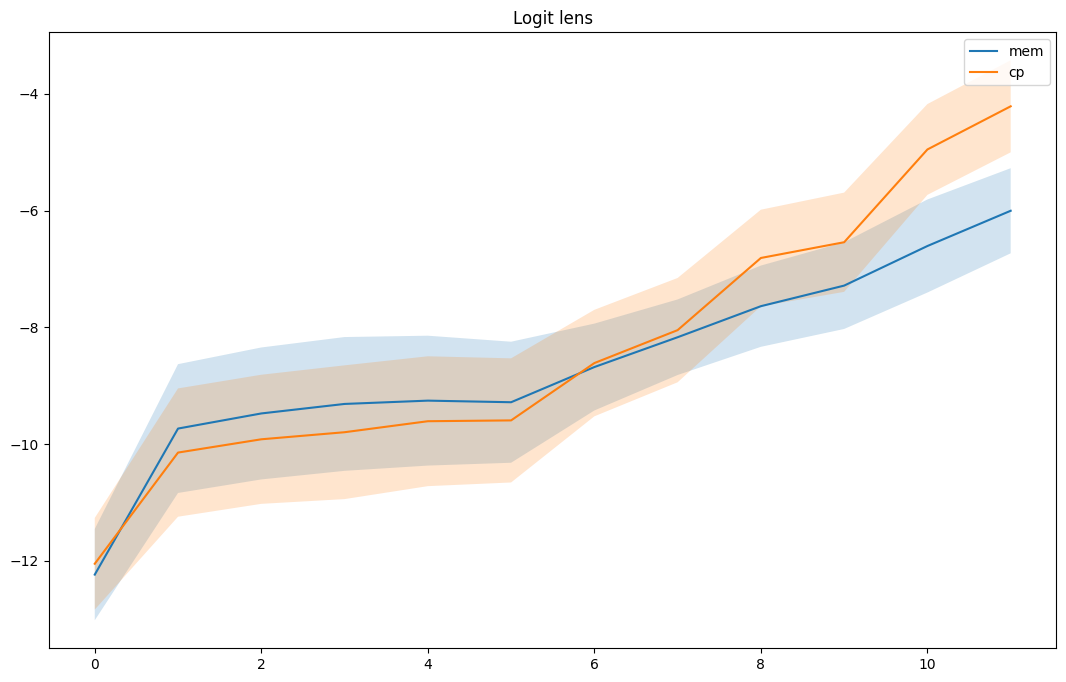

(tensor([[-12.9723, -12.6660, -12.6660,  ..., -12.9723, -12.6660, -12.4275],
         [-11.2266,  -9.3825,  -9.3935,  ..., -11.2326,  -9.2572,  -8.9012],
         [-11.0226,  -9.0403,  -9.0474,  ..., -10.9895,  -9.1955,  -8.8628],
         ...,
         [ -7.4760,  -7.8330,  -7.9526,  ...,  -7.1140,  -7.6997,  -6.7045],
         [ -6.7318,  -7.7556,  -7.6141,  ...,  -6.5246,  -6.8142,  -5.8868],
         [ -5.8747,  -6.8606,  -6.7845,  ...,  -6.3641,  -6.1163,  -5.6538]]),
 tensor([[-12.1129, -11.5021, -11.5176,  ..., -11.8071, -12.3829, -12.5478],
         [-11.1363, -10.5811, -10.8609,  ..., -13.1264, -10.5125,  -9.1730],
         [-10.6705, -10.3755, -10.7796,  ..., -12.9095, -10.6282,  -8.8925],
         ...,
         [ -6.7786,  -7.1465,  -7.4079,  ...,  -7.4392,  -7.8531,  -6.3513],
         [ -4.8968,  -4.3888,  -5.0457,  ...,  -5.9797,  -4.8994,  -5.2292],
         [ -3.6537,  -3.5882,  -3.9097,  ...,  -5.1743,  -3.2713,  -4.7437]]))

In [16]:
lens.logit_lens_single_len(19,True)

Logit lens at all layers: 100%|██████████| 11/11 [00:01<00:00,  6.28it/s]


logit_mem > logit_cp 0.6272727272727273


Logit lens at all layers: 100%|██████████| 17/17 [00:02<00:00,  6.21it/s]


logit_mem > logit_cp 0.6794117647058824


Logit lens at all layers: 100%|██████████| 9/9 [00:01<00:00,  7.09it/s]


logit_mem > logit_cp 0.6722222222222223


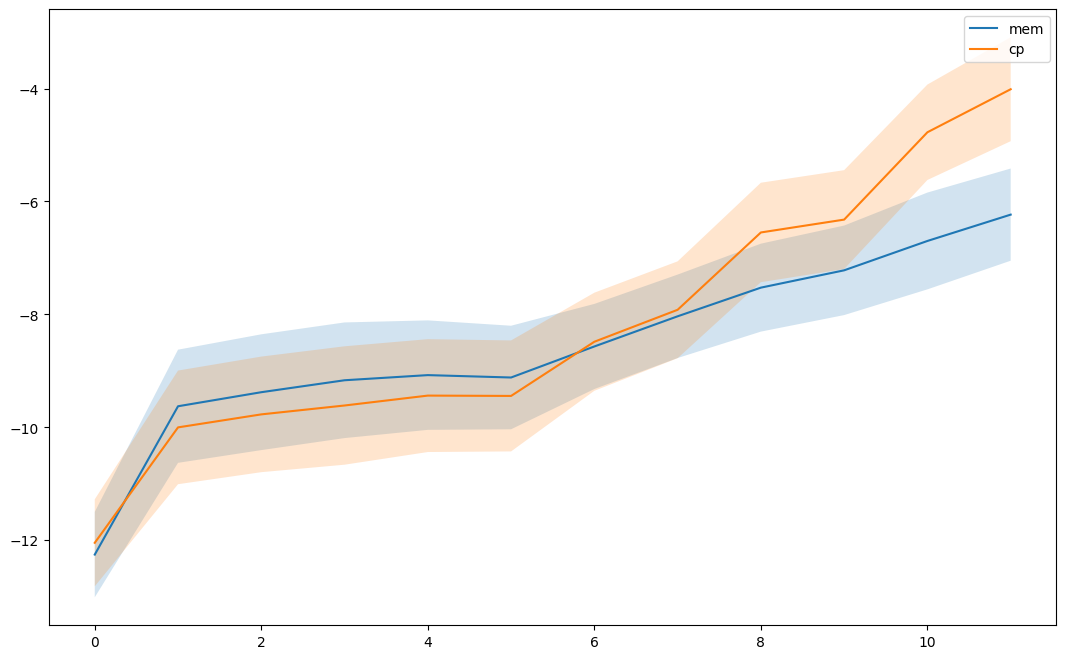

(tensor([[-12.9723, -12.6660, -12.6660,  ..., -12.7304, -10.3394, -12.8341],
         [-11.2266,  -9.3825,  -9.3935,  ...,  -8.8329,  -7.7766,  -9.2082],
         [-11.0226,  -9.0403,  -9.0474,  ...,  -8.8943,  -7.1684,  -9.1904],
         ...,
         [ -7.4760,  -7.8330,  -7.9526,  ...,  -8.5024,  -5.9677,  -7.7593],
         [ -6.7318,  -7.7556,  -7.6141,  ...,  -8.1472,  -5.4527,  -7.4221],
         [ -5.8747,  -6.8606,  -6.7845,  ...,  -7.7058,  -5.3384,  -7.1569]]),
 tensor([[-12.1129, -11.5021, -11.5176,  ..., -12.2078, -10.5958, -13.1459],
         [-11.1363, -10.5811, -10.8609,  ...,  -9.9486,  -7.3455, -10.9088],
         [-10.6705, -10.3755, -10.7796,  ...,  -9.9136,  -6.7253, -10.8773],
         ...,
         [ -6.7786,  -7.1465,  -7.4079,  ...,  -6.9849,  -5.3974,  -7.7243],
         [ -4.8968,  -4.3888,  -5.0457,  ...,  -6.2346,  -4.5813,  -4.4554],
         [ -3.6537,  -3.5882,  -3.9097,  ...,  -4.2527,  -4.0695,  -2.8949]]))

In [28]:
lens.logit_lens_multi_len( True)

## Correlation

In [3]:
from src.ablate_heads import ResidCorrelation

resid = ResidCorrelation(model, dataset_, 40, filter_outliers=False)

100%|██████████| 9/9 [00:00<00:00, 10.28it/s]

PearsonRResult(statistic=0.5965846492988003, pvalue=2.242418948567503e-143)


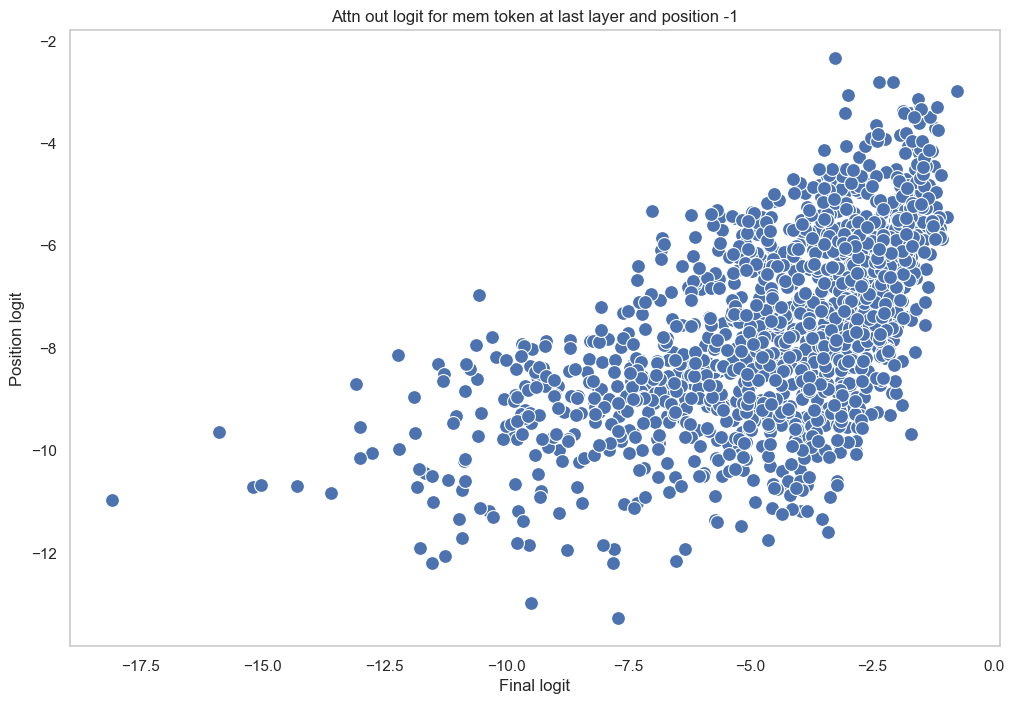

In [79]:

# final_logit, position_logit = resid.get_logit_single_len(17, "2_1_subject")
final_logit, position_logit = resid.get_correlation_all_len(position="last", layer=9, component="attn_out")
final_logit_mem = final_logit[:,0]
# position_logit_mem = final_logit[:,1]
position_logit_mem = position_logit[:,0]

# compute correlation between final logit and position logit
from scipy.stats import pearsonr
print(pearsonr(final_logit_mem, position_logit_mem))

#plot the scatter plot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.scatterplot(x=final_logit_mem, y=position_logit_mem, s=100)
plt.title('Attn out logit for mem token at last layer and position -1')
plt.xlabel('Final logit')
plt.ylabel('Position logit')
plt.show()

100%|██████████| 9/9 [00:00<00:00, 10.00it/s]


PearsonRResult(statistic=-0.2137375223534019, pvalue=9.415686842374982e-17)


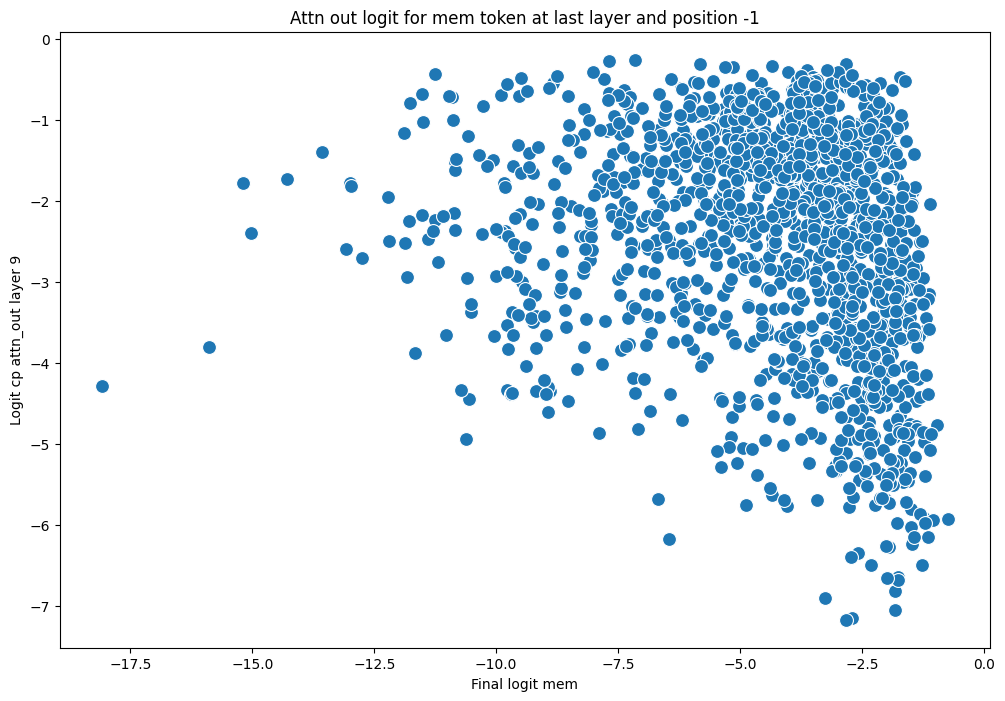

In [70]:
final_logit, position_logit_9 = resid.get_correlation_all_len(position="last", layer=9, component="attn_out")

final_logit_mem = final_logit[:,0]
# position_logit_mem = final_logit[:,1]
position_logit_mem = position_logit_9[:,1]

# compute correlation between final logit and position logit
from scipy.stats import pearsonr
print(pearsonr(final_logit_mem, position_logit_mem))

#plot the scatter plot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.scatterplot(x=final_logit_mem, y=position_logit_mem, s=100)
plt.title('Attn out logit for mem token at last layer and position -1')
plt.xlabel('Final logit mem')
plt.ylabel('Logit cp attn_out layer 9')
plt.show()

100%|██████████| 9/9 [00:00<00:00, 10.27it/s]

PearsonRResult(statistic=-0.24574125468408084, pvalue=8.527473651431544e-22)


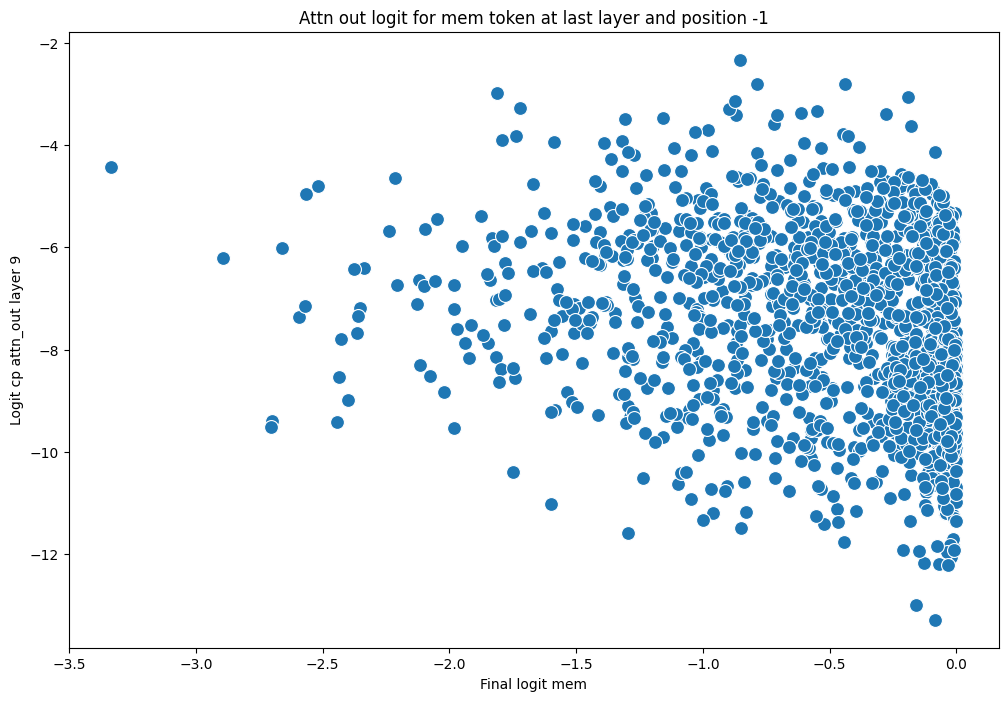

In [22]:

# final_logit, position_logit = resid.get_logit_single_len(17, "2_1_subject")
final_logit, position_logit = resid.get_correlation_all_len(position="last", layer=9, component="attn_out")
final_logit_mem = final_logit_9[:,1]
# position_logit_mem = final_logit[:,1]
position_logit_mem = position_logit_9[:,0]

# compute correlation between final logit and position logit
from scipy.stats import pearsonr
print(pearsonr(final_logit_mem, position_logit_mem))

#plot the scatter plot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.scatterplot(x=final_logit_mem, y=position_logit_mem, s=100)
plt.title('Attn out logit for mem token at last layer and position -1')
plt.xlabel('Final logit mem')
plt.ylabel('Logit cp attn_out layer 9')
plt.show()

100%|██████████| 9/9 [00:00<00:00, 10.19it/s]


PearsonRResult(statistic=0.3149787723807628, pvalue=1.9158071819166485e-35)


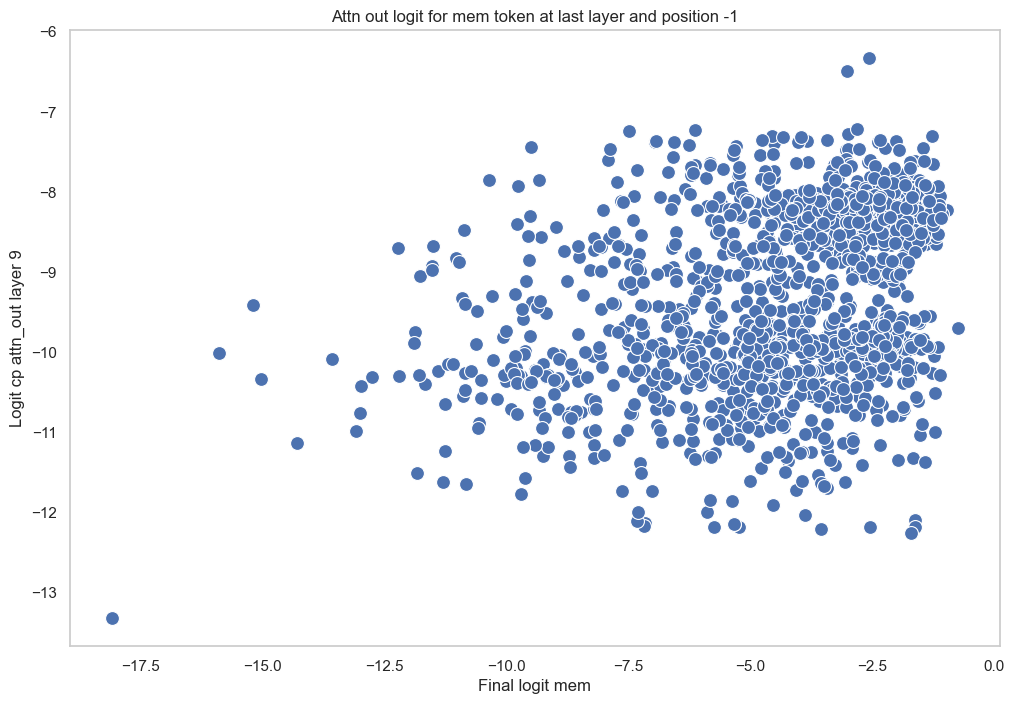

In [91]:
final_logit, position_logit_9 = resid.get_correlation_all_len(position="2_1_subject", layer=2, component="resid_post")

final_logit_mem = final_logit[:,0]
# position_logit_mem = final_logit[:,1]
position_logit_mem = position_logit_9[:,0]

# compute correlation between final logit and position logit
from scipy.stats import pearsonr
print(pearsonr(final_logit_mem, position_logit_mem))

#plot the scatter plot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.scatterplot(x=final_logit_mem, y=position_logit_mem, s=100)
plt.title('Attn out logit for mem token at last layer and position -1')
plt.xlabel('Final logit mem')
plt.ylabel('Logit cp attn_out layer 9')
plt.show()